## <center>Sberbank Russian Housing Market<center>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from datetime import datetime

****************************

In [2]:
dfr=pd.read_csv("train.csv")
dfr.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [3]:
data=dfr.copy()

In [4]:
data.shape

(30471, 292)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [6]:
data.columns.tolist()

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

### *Analysing Raw Data*
*************************

In [7]:
#Checking categorical features 
cat_cols=[feat for feat in data.columns if data[feat].dtype=='O']

In [8]:
for i in data[cat_cols].columns:
    print(i)
    print(data[i].unique(),"\n")

timestamp
['2011-08-20' '2011-08-23' '2011-08-27' ... '2015-06-27' '2015-06-29'
 '2015-06-30'] 

product_type
['Investment' 'OwnerOccupier'] 

sub_area
['Bibirevo' 'Nagatinskij Zaton' "Tekstil'shhiki" 'Mitino' 'Basmannoe'
 'Nizhegorodskoe' "Sokol'niki" 'Koptevo' 'Kuncevo' 'Kosino-Uhtomskoe'
 'Zapadnoe Degunino' 'Presnenskoe' 'Lefortovo' "Mar'ino" "Kuz'minki"
 'Nagornoe' "Gol'janovo" 'Vnukovo' 'Juzhnoe Tushino' 'Severnoe Tushino'
 "Chertanovo Central'noe" 'Fili Davydkovo' 'Otradnoe' 'Novo-Peredelkino'
 'Bogorodskoe' 'Jaroslavskoe' 'Strogino' 'Hovrino' "Moskvorech'e-Saburovo"
 'Staroe Krjukovo' 'Ljublino' 'Caricyno' 'Veshnjaki' 'Danilovskoe'
 'Preobrazhenskoe' "Kon'kovo" 'Brateevo' 'Vostochnoe Izmajlovo'
 'Vyhino-Zhulebino' 'Donskoe' 'Novogireevo' 'Juzhnoe Butovo' 'Sokol'
 'Kurkino' 'Izmajlovo' 'Severnoe Medvedkovo' 'Rostokino'
 'Orehovo-Borisovo Severnoe' 'Ochakovo-Matveevskoe' 'Taganskoe'
 'Dmitrovskoe' 'Orehovo-Borisovo Juzhnoe' 'Teplyj Stan' 'Babushkinskoe'
 'Pokrovskoe Streshnevo' '

In [9]:
# Converting dtype of timestamp column to datetime

data['timestamp']=pd.to_datetime(data['timestamp'])

In [10]:
# adding new columns: month, year 

data.insert(2,'month_sold', data['timestamp'].dt.month)
data.insert(3,'year_sold', data['timestamp'].dt.year)

In [11]:
# adding column: apartment age

data.insert(4,'aprt_age', data['year_sold']-data['build_year'])

In [12]:
data.head()

,id,timestamp,month_sold,year_sold,aprt_age,full_sq,life_sq,floor,max_floor,material,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,8,2011,NaN,43,27.0,4.0,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,8,2011,NaN,34,19.0,3.0,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,8,2011,NaN,43,29.0,2.0,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,9,2011,NaN,89,50.0,9.0,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,9,2011,NaN,77,77.0,4.0,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [14]:
null_features = [features for features in data.columns if data[features].isna().any()==True]
null_features

['aprt_age',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_av

In [15]:
data['year_sold'].value_counts().sort_index()

2011      753
2012     4839
2013     7978
2014    13662
2015     3239
Name: year_sold, dtype: int64

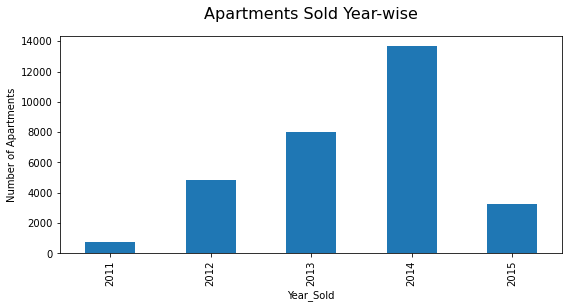

In [16]:
data['year_sold'].value_counts().sort_index().plot(kind='bar', figsize=(9,4))
plt.title("Apartments Sold Year-wise", y=1.05, fontsize='16')
plt.xlabel("Year_Sold")
plt.ylabel("Number of Apartments");

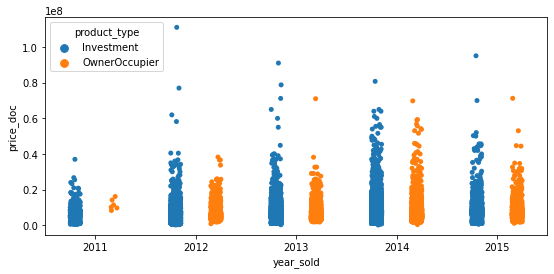

In [17]:
plt.figure(figsize=(9,4))
sns.stripplot(x='year_sold', y='price_doc', hue='product_type', data=data, dodge=True);

In [18]:
data.pivot_table(index=['product_type'], columns=['year_sold'], aggfunc={'price_doc':'count'})

price_doc                        
year_sold          2011  2012  2013  2014  2015
product_type                                   
Investment          747  3231  4650  9065  1755
OwnerOccupier         6  1608  3328  4597  1484

*There was a subsequent increase in number of apartments being sold for four years but a sharp decline can be seen in 2015. It suggests some event happen in the particular year or less demand/high price in real estate sector due to its cyclical nature.*

*A Supporting article is found: https://www.globalpropertyguide.com/Europe/Russia/Price-History-Archive/russia-if-this-is-autumn-how-bad-will-winter-be-127381*

*Most of the apartments are bought for Investment purposes rather OwnerOccupier and that is not the case for any particular year, it is for every year, more apartments are being sold in terms of count and price as well for Investing purpose.*

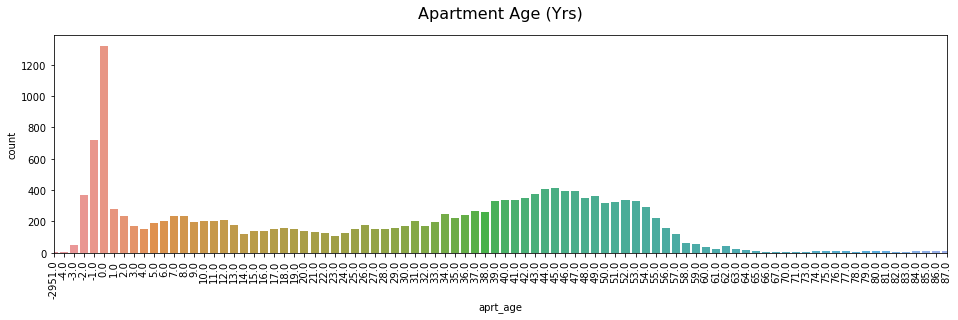

In [19]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
s=sns.countplot(data['aprt_age'])
plt.title("Apartment Age (Yrs)", y=1.05, fontsize='16')
s.set(xlim=[1,90]);

*Count of apartments sold according to its age, there is decent demand for 40-50 year old property, this could be due to cheaper price or area specific.*

*Data shows that there are huge number of apartments being built and sold in same year, and many of them are sold(booking amount/full) in advance.*

*Traget selling could be done on newly constructed/to be built apartments or properties which are either recently build or 40-50 years old.*

In [20]:
i=data['full_sq'].sort_values(ascending=False).head(1).index
data=data.drop(i, axis=0)

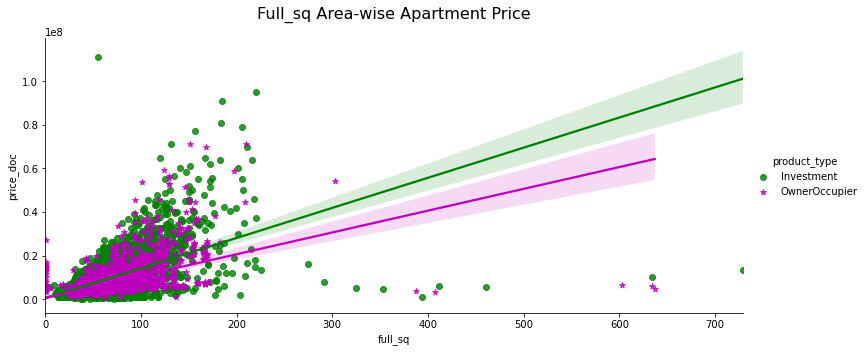

In [21]:
ax=sns.lmplot(data=data, x='full_sq', y='price_doc', hue='product_type', size=4.5, aspect=2.3, 
           markers=['o','*'], palette=dict(Investment="g", OwnerOccupier="m"))
ax = plt.gca()
ax.set_title("Full_sq Area-wise Apartment Price", y=1.05, fontsize='16');

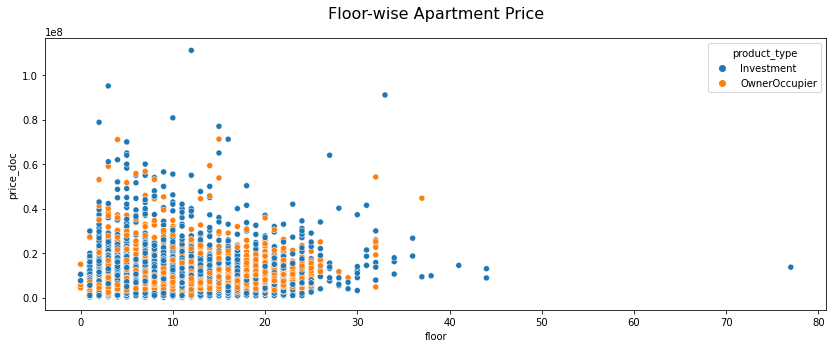

In [22]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=data, x=data['floor'], y=data['price_doc'], hue=data['product_type'])
ax = plt.gca()
ax.set_title("Floor-wise Apartment Price", y=1.05, fontsize='16');

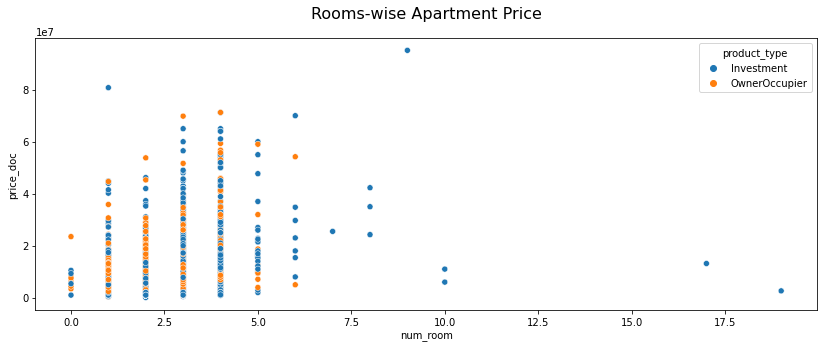

In [23]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=data, x=data['num_room'], y=data['price_doc'], hue=data['product_type'])
ax = plt.gca()
ax.set_title("Rooms-wise Apartment Price", y=1.05, fontsize='16');

*Good price range is there with respect to area and number of rooms multiple options are available from cheaper to costlier rates, lower and higher bar is squeezing to a reasonable price band for 5, 6 rooms apartment between 10-40mn , and price gradually decreases as the floor of property increases*

In [24]:
data['state'].unique()

array([nan,  3.,  1.,  2.,  4., 33.])

In [25]:
data['state']=np.where(data['state']==33, 3, data['state'])
data['state'].value_counts()

2.0    5844
3.0    5791
1.0    4855
4.0     422
Name: state, dtype: int64

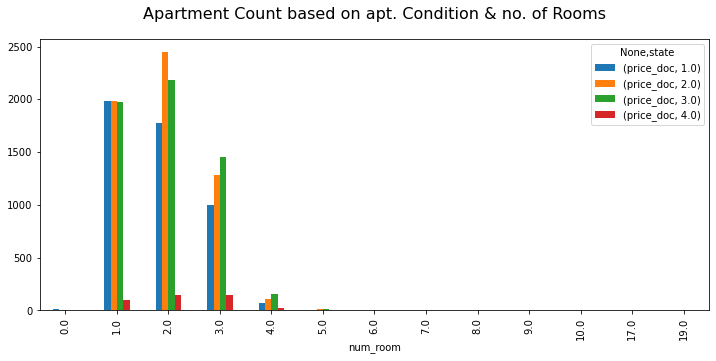

In [26]:
data.pivot_table(index=['num_room'], columns=['state'], 
                 aggfunc={'price_doc':'count'}).plot(kind='bar', figsize=(12,5))
plt.title("Apartment Count based on apt. Condition & no. of Rooms", y=1.05, fontsize='16');

In [41]:
data.pivot_table(index=['num_room'], columns=['state','product_type'], 
                 aggfunc={'price_doc':'count'}).iloc[1:6,:].fillna(0).astype(int)

price_doc                                                    \
state               1.0                      2.0                      3.0   
product_type Investment OwnerOccupier Investment OwnerOccupier Investment   
num_room                                                                    
1.0                 184          1801       1972            16       1906   
2.0                 165          1613       2437            15       2154   
3.0                 142           856       1271            10       1421   
4.0                  22            52        108             0        151   
5.0                   3             5          8             1         14   

                                                     
state                             4.0                
product_type OwnerOccupier Investment OwnerOccupier  
num_room                                             
1.0                     65         99             2  
2.0                     31        136             6  
3.0                     36        149             0  
4.0                      4         25             1  
5.0                      1          3             0

*1:Normal, 2:Average, 3:Good, 4:Excellent*

*More People prefers 1 or 2 room apartments with normal condition apartment as Owneroccupier but for investment point of view the count is more for apartments with good condition*

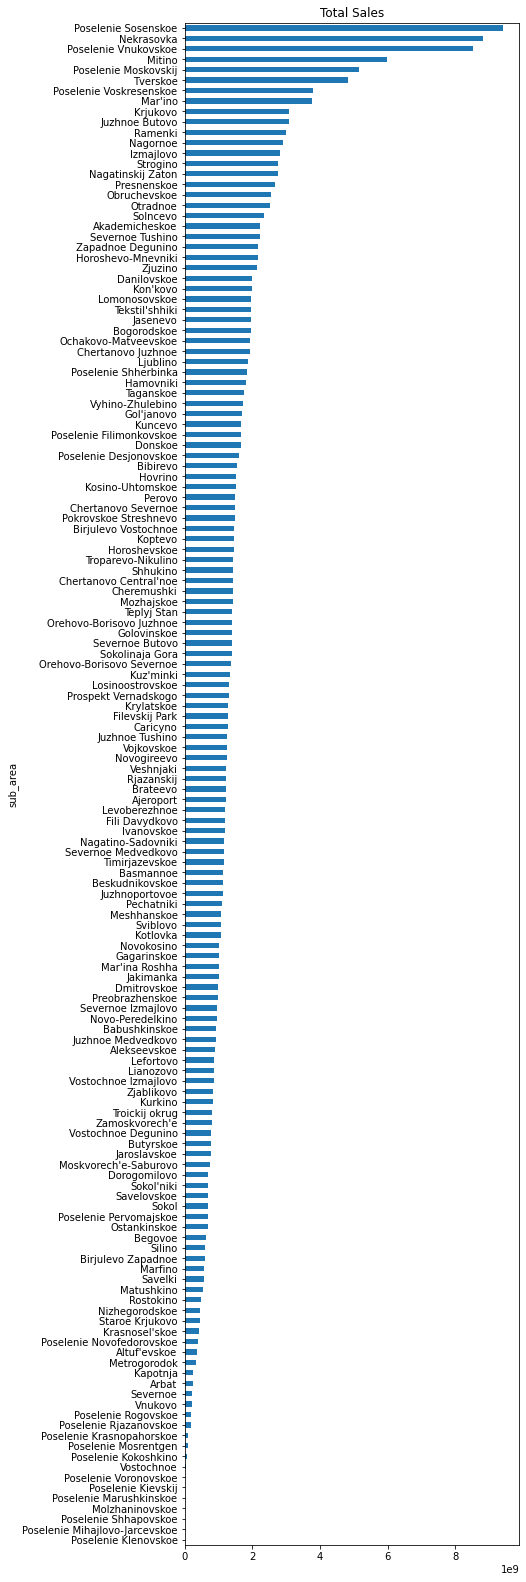

In [42]:
data.groupby('sub_area')['price_doc'].sum().sort_values().plot(kind='barh', figsize=(6,28))
plt.title("Total Sales");

*There are some specific areas where the sales are exceptionally high and some has neglegible sales. Doing calculation and check min price, max price and total sales of some high, medium and low sale category.*

In [45]:
display(data.groupby('sub_area')['price_doc'].aggregate([min, max, 'mean', 'count']).sort_values(by='count',ascending=False).head(6),
       data.groupby('sub_area')['price_doc'].aggregate([min, max, 'mean', 'count']).sort_values(by='count',ascending=False).loc['Sokolinaja Gora':'Krylatskoe'],
       data.groupby('sub_area')['price_doc'].aggregate([min, max, 'mean', 'count']).sort_values(by='count',ascending=False).tail(6))

,min,max,mean,count
sub_area,,,,
Poselenie Sosenskoe,1000000,18130000,5.303810e+06,1776
Nekrasovka,331464,9500000,5.467535e+06,1611
Poselenie Vnukovskoe,1963500,15385529,6.215746e+06,1372
Poselenie Moskovskij,1544000,15043290,5.583573e+06,925
Poselenie Voskresenskoe,2018520,9530900,5.322553e+06,713
Mitino,354289,25000000,8.809623e+06,679


,min,max,mean,count
sub_area,,,,
Sokolinaja Gora,917000,23900000,7.421747e+06,188
Obruchevskoe,360000,65000000,1.385088e+07,185
Kuncevo,990000,52000000,9.105386e+06,184
Brateevo,1000000,15000000,6.732381e+06,182
Severnoe Butovo,500000,15600000,7.700877e+06,182
Rjazanskij,1000000,18000000,6.832940e+06,180
Hovrino,1000000,23500000,8.546164e+06,178
Losinoostrovskoe,1000000,20000000,7.385353e+06,177
Juzhnoe Tushino,500000,36000000,7.185202e+06,175


,min,max,mean,count
sub_area,,,,
Poselenie Marushkinskoe,1000000,5600000,3.175000e+06,6
Molzhaninovskoe,1100000,6000000,2.766667e+06,3
Poselenie Kievskij,4250000,15190446,9.720223e+06,2
Poselenie Shhapovskoe,2851000,3000000,2.925500e+06,2
Poselenie Klenovskoe,1000000,1000000,1.000000e+06,1
Poselenie Mihajlovo-Jarcevskoe,3480000,3480000,3.480000e+06,1


In [46]:
round(sum(data.groupby('sub_area')['price_doc'].sum().sort_values(ascending=False).head(15))/sum(data['price_doc']),2)*100

33.0

*Just 15 sub_areas alone out of 146 are contributing 33% (one third) of the total Sales, also the sub_area where most apartments are being sold have good price range to offer from reasonably low to high.*

In [47]:
def check_needs(area):
    needs=['office_count_1000', 'cafe_count_1000', 'trc_count_1000',
           'market_count_1000', 'healthcare_centers_raion']
    data.groupby("sub_area").get_group(area)[needs].sum().plot(kind='bar', color=['C3','C2','C1','C5','C10'], figsize=(8,3))
    plt.show()

Krylatskoe


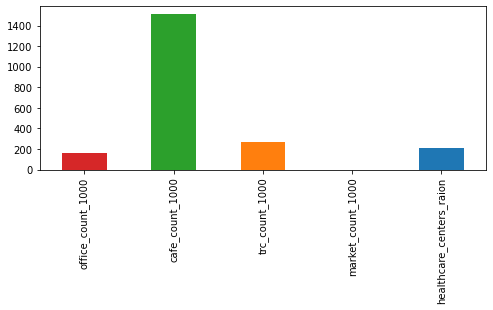

Nekrasovka


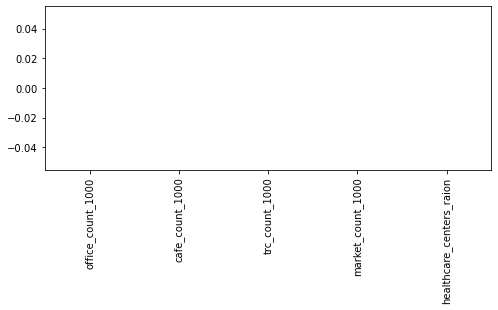

Mitino


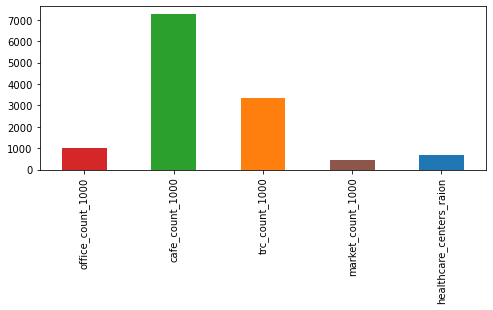

Kuz'minki


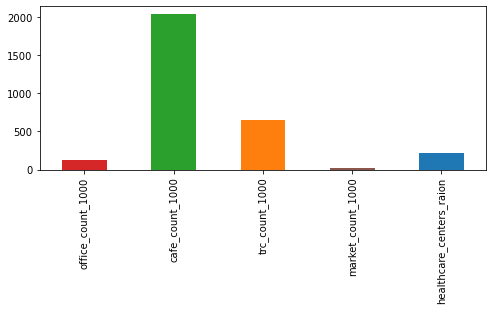

Poselenie Marushkinskoe


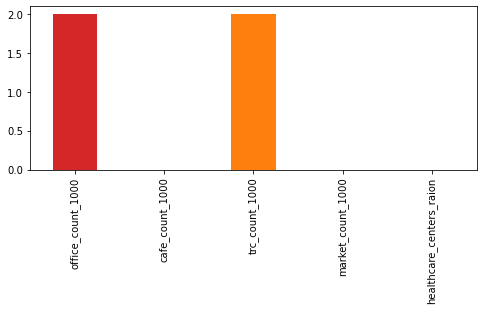

Koptevo


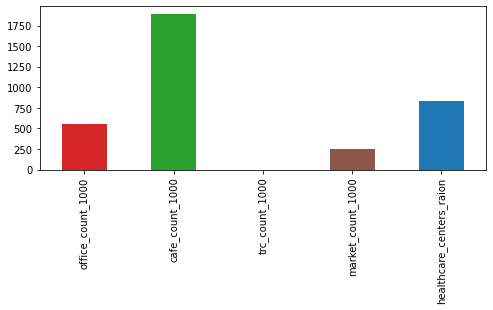

In [48]:
for col in ['Krylatskoe','Nekrasovka',"Mitino", "Kuz'minki", "Poselenie Marushkinskoe", "Koptevo"]:
    print(col)
    check_needs(col)


*Some areas like Nekrasovka where second most apartments are sold doesn't have market, heathcare centre, office, cafes, etc within 1000m range.*

In [49]:
import networkx as nx

In [50]:
def transport_proximity(num):
    datf=data[['metro_km_walk','railroad_station_avto_km', 'bus_terminal_avto_km', 'school_km', 'sub_area']]
    datf['source']='metro_rail_bus_school'
    nearby_transport=datf.loc[(data['metro_km_walk']<num) & (data['bus_terminal_avto_km']<num)
                              & (data['railroad_station_avto_km']<num) & (data['school_km']<num)]
    plt.figure(figsize=(14,7))
    g=nx.from_pandas_edgelist(nearby_transport, source='source', target='sub_area', edge_attr='metro_km_walk')
    nx.draw_networkx(g, node_color='violet')
    plt.title("Areas where metro, railway, bus_terminal, school are within {}m range".format(num*1000), y=1.05, fontsize='16')
    plt.show()
    print("-"*125)
    print(" , ".join(list(nearby_transport['sub_area'].unique())))
    print("-"*125)

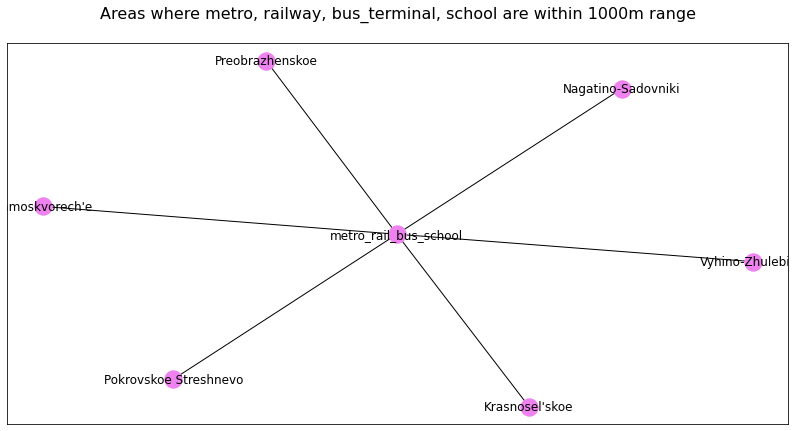

-----------------------------------------------------------------------------------------------------------------------------
Preobrazhenskoe , Vyhino-Zhulebino , Pokrovskoe Streshnevo , Zamoskvorech'e , Nagatino-Sadovniki , Krasnosel'skoe
-----------------------------------------------------------------------------------------------------------------------------


In [51]:
transport_proximity(1)

*Apart of checking sub_area, we can also analyse total number of apartments or particular apartments which fall under the given proximity and can introduce more factors like parks, industrial_zone, nearest_major_road, public_healthcare, stadium_km, fitness_km distances and then check with respect to sub_area or price_doc*

In [52]:
dist=[feat for feat in data.columns if 'km' in feat]
dist

['metro_km_avto',
 'metro_km_walk',
 'kindergarten_km',
 'school_km',
 'park_km',
 'green_zone_km',
 'industrial_km',
 'water_treatment_km',
 'cemetery_km',
 'incineration_km',
 'railroad_station_walk_km',
 'railroad_station_avto_km',
 'public_transport_station_km',
 'water_km',
 'mkad_km',
 'ttk_km',
 'sadovoe_km',
 'bulvar_ring_km',
 'kremlin_km',
 'big_road1_km',
 'big_road2_km',
 'railroad_km',
 'zd_vokzaly_avto_km',
 'bus_terminal_avto_km',
 'oil_chemistry_km',
 'nuclear_reactor_km',
 'radiation_km',
 'power_transmission_line_km',
 'thermal_power_plant_km',
 'ts_km',
 'big_market_km',
 'market_shop_km',
 'fitness_km',
 'swim_pool_km',
 'ice_rink_km',
 'stadium_km',
 'basketball_km',
 'hospice_morgue_km',
 'detention_facility_km',
 'public_healthcare_km',
 'university_km',
 'workplaces_km',
 'shopping_centers_km',
 'office_km',
 'additional_education_km',
 'preschool_km',
 'big_church_km',
 'church_synagogue_km',
 'mosque_km',
 'theater_km',
 'museum_km',
 'exhibition_km',
 'cateri

In [53]:
def power_proximity(num):
    datf=data[['thermal_power_plant_km','nuclear_reactor_km', 'oil_chemistry_km', 'sub_area']]
    datf['source']='thermal_nuclear_chemicalindustry'
    nearby_transport=datf.loc[(data['thermal_power_plant_km']>num) & (data['nuclear_reactor_km']>num)
                              & (data['oil_chemistry_km']>num)]
    plt.figure(figsize=(14,7))
    g=nx.from_pandas_edgelist(nearby_transport, source='source', target='sub_area', edge_attr='thermal_power_plant_km')
    nx.draw_networkx(g, node_color='green')
    plt.title("Areas where thermal powerplant, nuclear powerplant, chemical plants are {}km away".format(num), y=1.05, fontsize='16')
    plt.show()
    print("-"*125)
    print(" , ".join(list(nearby_transport['sub_area'].unique())))
    print("-"*125)

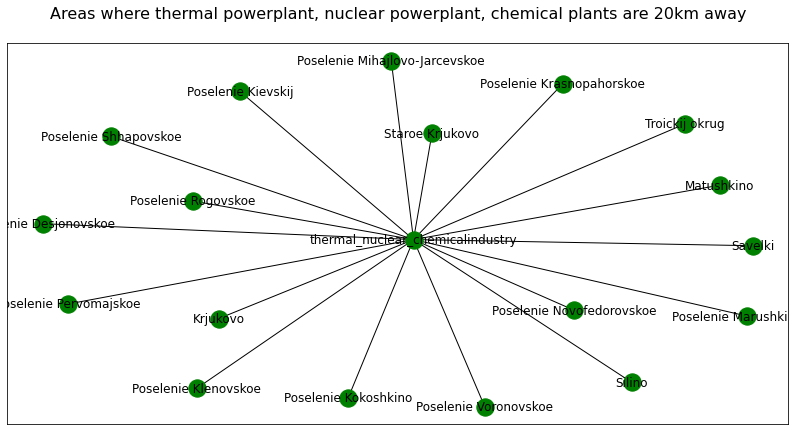

-----------------------------------------------------------------------------------------------------------------------------
Staroe Krjukovo , Krjukovo , Silino , Savelki , Matushkino , Poselenie Pervomajskoe , Troickij okrug , Poselenie Marushkinskoe , Poselenie Shhapovskoe , Poselenie Kokoshkino , Poselenie Krasnopahorskoe , Poselenie Novofedorovskoe , Poselenie Voronovskoe , Poselenie Klenovskoe , Poselenie Rogovskoe , Poselenie Desjonovskoe , Poselenie Kievskij , Poselenie Mihajlovo-Jarcevskoe
-----------------------------------------------------------------------------------------------------------------------------


In [54]:
power_proximity(20)

In [63]:
def price(area):
    if type(area)==type(list()):
        for ar in area:
            print(ar)
            print(pd.DataFrame(data.groupby("sub_area").get_group(ar)['price_doc'].aggregate([min,max,'count'])))
            print(" ")
    else:
        li=[]
        li.append(area)
        for ar in li:
            print(ar)
            print(pd.DataFrame(data.groupby("sub_area").get_group(ar)['price_doc'].aggregate([min,max,'count'])))
            print(" ")

In [64]:
price(['Dorogomilovo','Horoshevskoe'])

Dorogomilovo
       price_doc
min      1000000
max     28300000
count         56
 
Horoshevskoe
       price_doc
min       500000
max     56500000
count        136
 


*Above are some area where metro, rail, schools are within 500m range and apartments in some areas are sold at reasonable/cheaper price.*

*I notice a lot of features related to cafe, possibly this could hold some useful information and may be some relation with apartment price.*

In [88]:
caf=[feat for feat in data.columns if 'cafe' in feat]
caf

['cafe_count_500',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_count_500_na_price',
 'cafe_count_500_price_500',
 'cafe_count_500_price_1000',
 'cafe_count_500_price_1500',
 'cafe_count_500_price_2500',
 'cafe_count_500_price_4000',
 'cafe_count_500_price_high',
 'cafe_count_1000',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_count_1000_na_price',
 'cafe_count_1000_price_500',
 'cafe_count_1000_price_1000',
 'cafe_count_1000_price_1500',
 'cafe_count_1000_price_2500',
 'cafe_count_1000_price_4000',
 'cafe_count_1000_price_high',
 'cafe_count_1500',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_count_1500_na_price',
 'cafe_count_1500_price_500',
 'cafe_count_1500_price_1000',
 'cafe_count_1500_price_1500',
 'cafe_count_1500_price_2500',
 'cafe_count_1500_price_4000',
 'cafe_count_1500_price_high',
 'cafe_count_2000',
 'cafe_sum_2000_min_price

In [89]:
len(caf)

66

In [91]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)

In [92]:
len(correlation(data[caf],0.75))

59

In [93]:
slice=list(set(caf)-set(correlation(data[caf],0.75)))
slice.append('price_doc')
slice

['cafe_count_1000_price_high',
 'cafe_sum_5000_min_price_avg',
 'cafe_sum_3000_min_price_avg',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_2000_min_price_avg',
 'cafe_count_500',
 'price_doc']

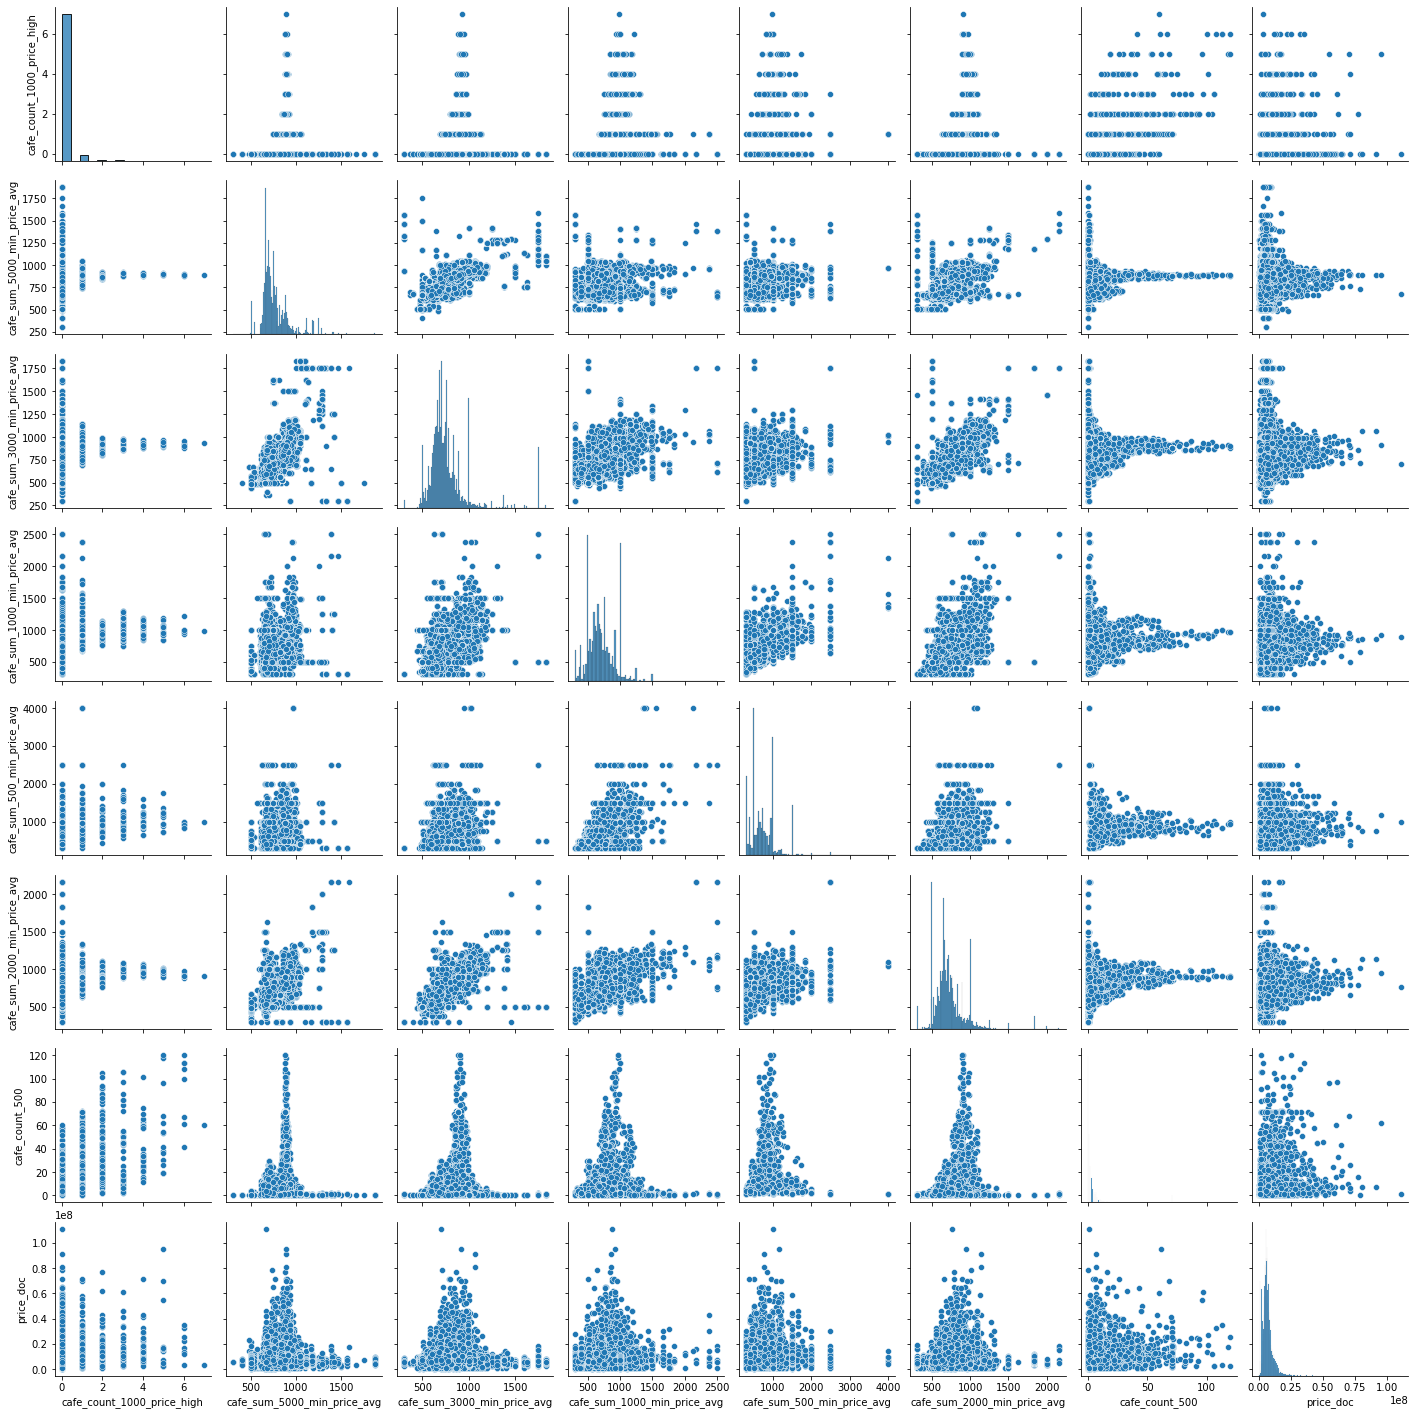

In [197]:
sns.pairplot(data[slice]);

*We can see a good normal distribution of price_doc with respect to other features though some are little right skewed but deviation looks proportionate, so they will be better trained with model, Also 'cafe_count_500' looks quite inversely dependent to price_doc, we will analyse it*

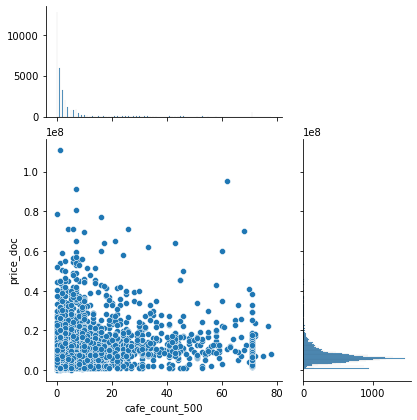

In [136]:
sns.jointplot(x='cafe_count_500', y='price_doc', data=data[data['cafe_count_500']<80], marginal_ticks=True, ratio=2);

In [179]:
countt=pd.cut(data['cafe_count_500'], [-1,10,20,30,40,50,60,70,80])

In [180]:
data.pivot_table(index=['product_type'], columns=[countt], aggfunc={'price_doc':'count'})

price_doc                                               \
cafe_count_500  (-1, 10] (10, 20] (20, 30] (30, 40] (40, 50] (50, 60]   
product_type                                                            
Investment         18237      755      145       81       93       49   
OwnerOccupier      10416       20       10        4        1        0   

                                  
cafe_count_500 (60, 70] (70, 80]  
product_type                      
Investment           19       47  
OwnerOccupier         1      564

In [189]:
(18237+10416)/data.shape[0]*100

94.03675746636036

*Very high density of apartments can be seen where less number of cafes or restuarant are there within 500m range, as the cafe count increases apartment count decreased drastically. 94% of the samples comes under the range of 0-10 cafes within 500m, so this feature could have importance and can be taken as good factor to consider when buying apartment.*

In [65]:
x=data.groupby('ecology')['id'].count()
x

ecology
excellent       3938
good            7174
no data         7656
poor            8017
satisfactory    3685
Name: id, dtype: int64

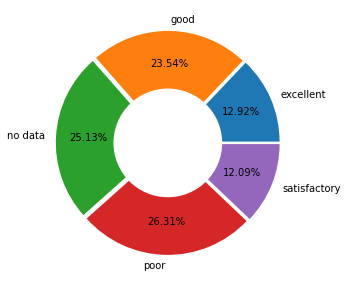

In [66]:
plt.figure(figsize=(10, 5))
plt.pie(x, labels=x.index, autopct='%.2f%%', explode=[0.03]*5, pctdistance=0.7)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

In [67]:
data.pivot_table(index=['product_type'], columns=['ecology'], 
                 aggfunc={'price_doc':'count'})#.iloc[1:6,:].fillna(0).astype(int)

price_doc                                 
ecology       excellent  good no data  poor satisfactory
product_type                                            
Investment         3020  4781    1275  7383         2989
OwnerOccupier       918  2393    6381   634          696

*Ecological conditions: around 50% of the apartments are in better ecological conditions and 25% data is unavailable so overall is good. OwnerOccupier type sale can be seen more with good ecological condition.*

*Distance related features can also be a important part like school_km, kindergarten_km, park_km, water_km, fitness_km,
However some age based population features like '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', and some other features like school_quota, preschool_quota, build_count, church_count, mosque_count are not looking related to apartment sale. We will also be validating this analysis when we work on feature selection and correlations*

**********************

**Train Test Split**

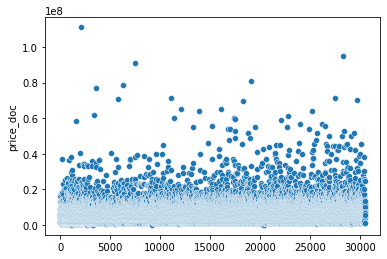

In [263]:
plt.figure(figsize=(6,4))
sns.scatterplot(dfr.index, dfr['price_doc']);

In [264]:
#dropping one datapoint with respect to price_doc having too high value
index=list(dfr['price_doc'].sort_values()[-1:].index)
index

[2118]

In [265]:
dfr.drop(index, axis=0, inplace=True)
dfr.shape

(30470, 292)

In [266]:
x=dfr.iloc[:, :-1]
y=dfr.iloc[:, -1:]

In [267]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=10)

In [268]:
x_train['sub_area'].nunique()-x_test['sub_area'].nunique()

6

In [269]:
set(x_train['sub_area'].unique())-set(x_test['sub_area'].unique())

{'Poselenie Kievskij',
 'Poselenie Klenovskoe',
 'Poselenie Marushkinskoe',
 'Poselenie Mihajlovo-Jarcevskoe',
 'Poselenie Shhapovskoe',
 'Vostochnoe'}

*These categories in sub_area are present in train set but not in test set so no problem untill vice versa*

### *Working on Train Set*
***************************

**Checking missing values**

In [270]:
print("------------ Colunns ------------------ NaN(%)")
print((round((x_train.isnull().mean()*100),2).sort_values(ascending=False).head(38)))

------------ Colunns ------------------ NaN(%)
hospital_beds_raion                      47.42
build_year                               44.70
state                                    44.41
cafe_avg_price_500                       43.70
cafe_sum_500_max_price_avg               43.70
cafe_sum_500_min_price_avg               43.70
max_floor                                31.35
material                                 31.35
num_room                                 31.35
kitch_sq                                 31.35
preschool_quota                          22.07
school_quota                             22.06
cafe_sum_1000_max_price_avg              21.61
cafe_sum_1000_min_price_avg              21.61
cafe_avg_price_1000                      21.61
life_sq                                  21.11
build_count_frame                        16.45
build_count_1971-1995                    16.45
build_count_block                        16.45
raion_build_count_with_material_info     16.45
build_count_a

Taking features with high percentage of missing values and checking if there is any correlation among them.

In [271]:
null_cols = list(x_train.isnull().sum().sort_values(ascending=False).head(10).index)
null_cols

['hospital_beds_raion',
 'build_year',
 'state',
 'cafe_avg_price_500',
 'cafe_sum_500_max_price_avg',
 'cafe_sum_500_min_price_avg',
 'max_floor',
 'material',
 'num_room',
 'kitch_sq']

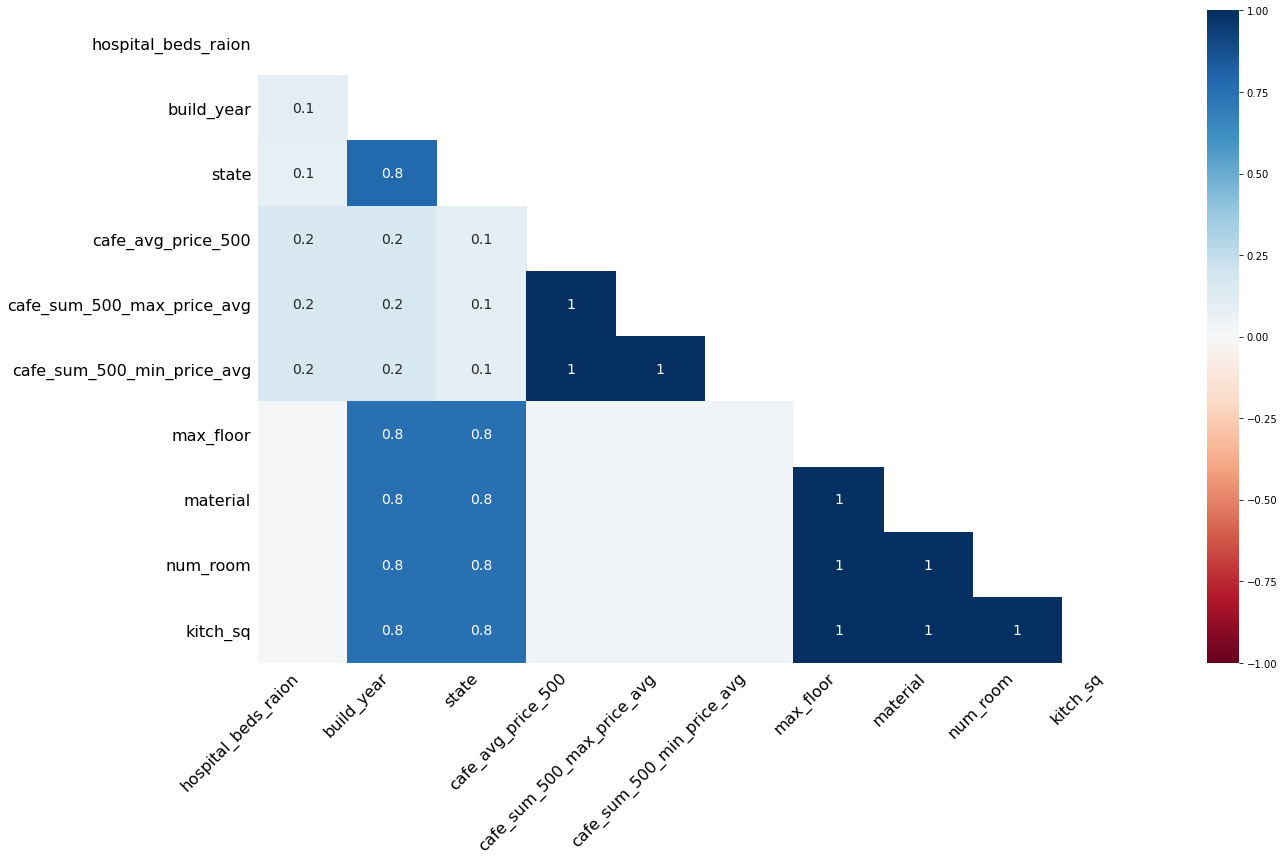

In [272]:
msno.heatmap(x_train[null_cols]);

*There can be seen a very high correlation(even totally corelated) between some features, these are MNAR and others can be treated as MCAR.*

**Checking for outliers**

In [273]:
attributes=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq']

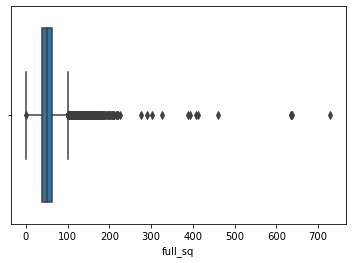

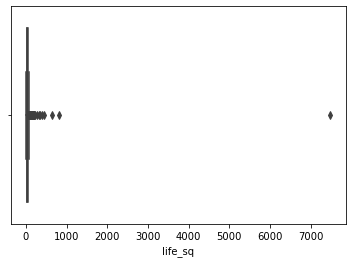

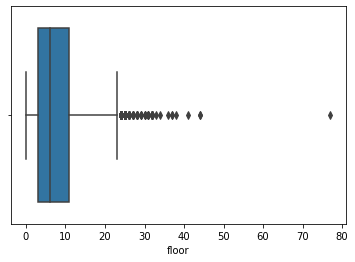

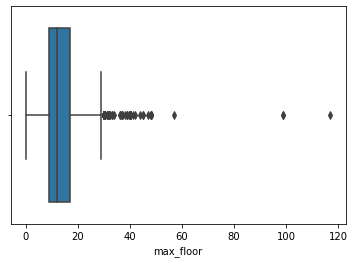

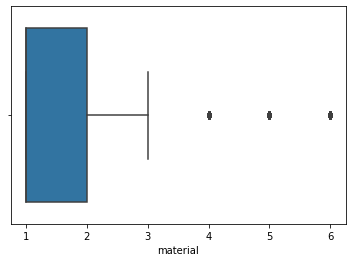

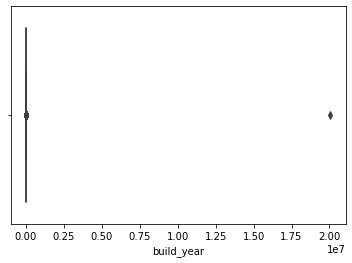

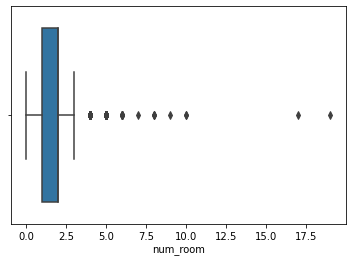

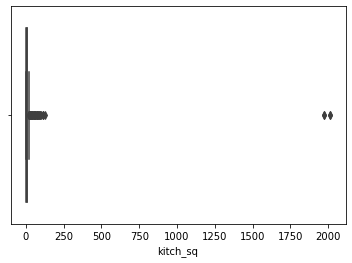

In [274]:
for col in attributes:
    sns.boxplot(x_train[col])
    plt.show()

*Some anamolies detected in apartment attributes and will be treated accordingly while handling these features. We will not be replacing all outliers since these are direct attributes of apartment and price could depend on it*

**Dropping out very highly correlated features**

In [275]:
def correlation(dataset, threshold):
    col_corr = set()  
    #sim=set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i]
                #col = corr_matrix.columns[j]
                col_corr.add(colname)
                #sim.add(col)
    return list(col_corr)

In [276]:
len(correlation(x_train, 0.99))

71

In [277]:
li=correlation(x_train, 0.99)
li

['7_14_male',
 'cafe_avg_price_3000',
 'public_transport_station_min_walk',
 '0_6_all',
 'cafe_count_5000_price_500',
 'cafe_count_1500_price_500',
 '0_13_female',
 'cafe_avg_price_5000',
 '0_17_all',
 'cafe_count_5000',
 'cafe_count_2000_price_1000',
 'ekder_female',
 'cafe_count_3000_price_1500',
 '0_13_all',
 '0_17_female',
 '7_14_female',
 'kremlin_km',
 'young_all',
 'bulvar_ring_km',
 'raion_build_count_with_builddate_info',
 'cafe_count_1500_price_1000',
 '16_29_all',
 'cafe_count_3000_price_2500',
 'sadovoe_km',
 'cafe_count_3000_price_4000',
 '0_17_male',
 'female_f',
 'cafe_count_5000_na_price',
 'cafe_count_3000_na_price',
 'cafe_count_5000_price_1000',
 'cafe_count_3000_price_500',
 '7_14_all',
 'cafe_count_1500_price_1500',
 'cafe_count_5000_price_1500',
 'cafe_count_5000_price_2500',
 'work_male',
 'cafe_count_2000',
 'railroad_station_walk_min',
 '16_29_female',
 '16_29_male',
 'cafe_count_1500',
 'preschool_km',
 'big_church_count_2000',
 'male_f',
 'church_count_2000',

In [278]:
x_train=x_train.drop(li, axis=1)
x_train.shape

(24376, 220)

In [279]:
x_train.isnull().sum().sort_values(ascending=False).head(40)

hospital_beds_raion                     11560
build_year                              10895
state                                   10826
cafe_sum_500_max_price_avg              10652
cafe_sum_500_min_price_avg              10652
num_room                                 7641
kitch_sq                                 7641
max_floor                                7641
material                                 7641
preschool_quota                          5379
school_quota                             5377
cafe_sum_1000_min_price_avg              5268
cafe_sum_1000_max_price_avg              5268
life_sq                                  5145
build_count_wood                         4011
build_count_1921-1945                    4011
build_count_frame                        4011
build_count_brick                        4011
build_count_monolith                     4011
build_count_foam                         4011
build_count_slag                         4011
build_count_mix                   

**Handling numerical features**

In [280]:
# I will be taking max_floor as a subgroup to fill missing values in build_year, 
# replacing null values with median, it will keep the data normally distributed.

x_train['max_floor'].fillna(x_train['max_floor'].median(), inplace=True)
x_train['max_floor'] = x_train['max_floor'].astype(int)

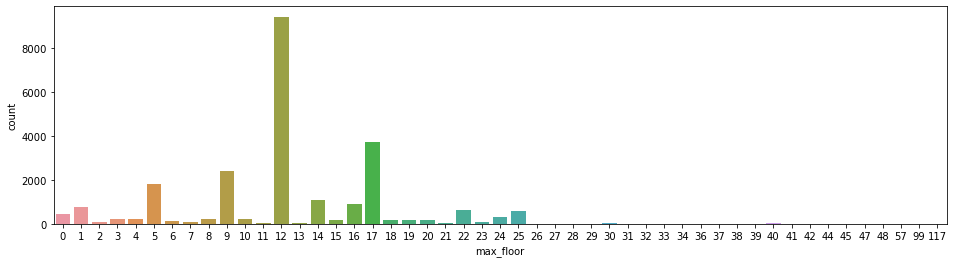

In [281]:
plt.figure(figsize=(16,4))
sns.countplot(x_train['max_floor']);

In [282]:
# Checking build_year column

print(x_train.loc[x_train['build_year']<1500]['build_year'].value_counts())
print(x_train.loc[x_train['build_year']>2020]['build_year'].value_counts())

0.0    419
1.0    292
3.0      2
Name: build_year, dtype: int64
20052009.0    1
Name: build_year, dtype: int64


In [283]:
x_train['build_year']=np.where(x_train['build_year']<5, np.nan, x_train['build_year'])
x_train.loc[x_train['build_year'] == 20052009.0, 'build_year']=2009

In [284]:
x_train.groupby(['sub_area', 'max_floor'])['build_year'].median()

sub_area   max_floor
Ajeroport  4            1955.0
           5            1960.0
           6            1938.0
           8            1960.0
           9            1965.5
                         ...  
Zjuzino    20           2012.0
           22           2011.5
           24           2004.0
           25              NaN
           30           2010.0
Name: build_year, Length: 1830, dtype: float64

In [285]:
x_train['build_year'].fillna(x_train.groupby(['sub_area', 'max_floor'])['build_year'].transform('median'),
                             inplace=True)

In [286]:
x_train['build_year'].isnull().sum()

736

In [287]:
x_train['build_year'].fillna(x_train.groupby(['sub_area'])['build_year'].transform('median'), inplace=True)
x_train['build_year'].isnull().sum()

0

In [288]:
x_train['floor'].fillna(x_train.groupby(['sub_area', 'max_floor'])['floor'].transform('median'), inplace=True)
x_train['floor'].fillna(x_train.groupby(['sub_area'])['floor'].transform('median'), inplace=True)
x_train['floor'].isnull().sum()

0

In [289]:
((x_train['max_floor']-x_train['floor'])<0).any() 

True

In [290]:
#there are some error where max floor are less than floor, need to correct
x_train['floor']=np.where((x_train['max_floor']-x_train['floor'])<0,x_train['max_floor'], x_train['floor'])

In [291]:
((x_train['max_floor']-x_train['floor'])<0).any() 

False

In [292]:
x_train['floor']=x_train['floor'].astype(int)
x_train['build_year']=x_train['build_year'].astype(int)

In [293]:
x_train['state'].value_counts()

2.0     4699
3.0     4598
1.0     3911
4.0      341
33.0       1
Name: state, dtype: int64

In [294]:
# capturing null values with new feature and replacing them with 0

x_train['state_null']=x_train['state'].isnull().astype(int)
x_train['state']=x_train['state'].replace({33:3, None:0})

In [295]:
# doing same with other high null values columns

x_train['cafe_sum_500_max_price_avg_null']=x_train['cafe_sum_500_max_price_avg'].isnull().astype(int)
x_train['cafe_sum_500_min_price_avg_null']=x_train['cafe_sum_500_min_price_avg'].isnull().astype(int)
x_train['cafe_sum_500_max_price_avg'].fillna(0, inplace=True)
x_train['cafe_sum_500_min_price_avg'].fillna(0, inplace=True)

In [296]:
x_train['hospital_beds_raion_null']=x_train['hospital_beds_raion'].isnull().astype(int)
x_train['hospital_beds_raion'].fillna(0, inplace=True)
x_train['hospital_beds_raion']=x_train['hospital_beds_raion'].astype(int)

In [297]:
x_train['full_sq'].isnull().sum()

0

In [298]:
# using full_sq column as a subgroup to fill null values in its realted features

def change(column):
    x_train[column].fillna(x_train.groupby(['sub_area', 'full_sq'])[column].transform('median'), inplace=True)
    x_train[column].fillna(x_train.groupby(['sub_area'])[column].transform('median'), inplace=True)
    x_train[column]=x_train[column].astype(int)


In [299]:
change('material')
change('num_room')
change('kitch_sq')
change('life_sq')

In [300]:
x_train['num_room'].unique()

array([ 1,  2,  3,  4,  9,  5,  0, 10,  6,  8, 19, 17,  7])

In [301]:
x_train['full_sq'].max()

729

In [302]:
x_train['life_sq']=np.where((x_train['life_sq']>x_train['full_sq']), x_train['full_sq'], x_train['life_sq'])

In [303]:
x_train['kitch_sq']=np.where(x_train['kitch_sq']>123, x_train['life_sq'].median(), x_train['kitch_sq'])

In [304]:
print(x_train['full_sq'].max(),x_train['life_sq'].max(),x_train['kitch_sq'].max())

729 637 123.0


In [305]:
print(((x_train['full_sq']-x_train['life_sq'])<0).any(), ((x_train['full_sq']-x_train['kitch_sq'])<0).any())

False True


In [306]:
x_train['kitch_sq']=np.where((x_train['full_sq']<x_train['kitch_sq']),
         (x_train['full_sq']-x_train['life_sq']), x_train['kitch_sq'])

In [307]:
((x_train['full_sq']-x_train['kitch_sq'])<0).any()

False

In [308]:
# replacing all build_count colums with its median

def build(column):
    x_train[column].fillna(x_train[column].median(), inplace=True)

In [309]:
build_cols=[feat for feat in x_train.columns if 'build_count' in feat and x_train[feat].isna().any()==True]
build_cols

['raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995']

In [310]:
for col in build_cols:
    build(col)

In [311]:
# doing same with cafe columns, replacing with average value
def cafe(column):
    x_train[column].fillna(x_train[column].mean(), inplace=True)

In [312]:
cafe_cols=[feat for feat in x_train.columns if 'cafe_sum' in feat and x_train[feat].isna().any()==True]
cafe_cols

['cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_sum_2000_min_price_avg',
 'cafe_sum_2000_max_price_avg',
 'cafe_sum_3000_min_price_avg',
 'cafe_sum_5000_min_price_avg']

In [313]:
for col in cafe_cols:
    cafe(col)

In [314]:
x_train.isnull().sum().sort_values(ascending=False).head(10)

preschool_quota             5379
school_quota                5377
prom_part_5000               150
ID_railroad_station_walk      19
metro_min_walk                19
railroad_station_walk_km      19
ID_big_road1                   0
big_road1_km                   0
ttk_km                         0
mkad_km                        0
dtype: int64

In [315]:
x_train['preschool_quota']=x_train['preschool_quota'].isnull().astype(int)
x_train['school_quota']=x_train['school_quota'].isnull().astype(int)
x_train['preschool_quota'].fillna(0, inplace=True)
x_train['school_quota'].fillna(0, inplace=True)

In [316]:
x_train['prom_part_5000'].fillna(x_train['prom_part_5000'].mean(), inplace=True)
x_train['ID_railroad_station_walk'].fillna(x_train['ID_railroad_station_walk'].median(), inplace=True)
x_train['railroad_station_walk_km'].fillna(x_train['railroad_station_walk_km'].mean(), inplace=True)
x_train['metro_min_walk'].fillna(x_train['metro_min_walk'].mean(), inplace=True)

In [317]:
x_train.isnull().sum().any()

False

**Handling categorical and temporal features**

In [318]:
category=[feat for feat in x_train.columns if x_train[feat].dtype=='O']
for i in x_train[category].columns:
    print(i)
    print(x_train[i].unique(),"\n")

timestamp
['2012-12-24' '2014-05-12' '2013-03-21' ... '2011-09-26' '2015-01-05'
 '2012-08-04'] 

product_type
['OwnerOccupier' 'Investment'] 

sub_area
['Nagatinskij Zaton' 'Timirjazevskoe' 'Caricyno' 'Zjuzino'
 'Poselenie Vnukovskoe' 'Brateevo' 'Pokrovskoe Streshnevo'
 'Poselenie Sosenskoe' 'Troparevo-Nikulino' 'Severnoe Tushino'
 'Sokolinaja Gora' 'Pechatniki' 'Juzhnoportovoe' 'Poselenie Shherbinka'
 'Tverskoe' 'Mitino' 'Ivanovskoe' 'Solncevo' 'Obruchevskoe'
 'Juzhnoe Tushino' 'Bibirevo' 'Nekrasovka' 'Golovinskoe'
 'Vostochnoe Degunino' 'Nagornoe' 'Kosino-Uhtomskoe' 'Shhukino'
 'Babushkinskoe' 'Donskoe' "Tekstil'shhiki" "Kuz'minki" 'Izmajlovo'
 'Levoberezhnoe' 'Chertanovo Severnoe' 'Alekseevskoe' 'Chertanovo Juzhnoe'
 'Poselenie Moskovskij' 'Novogireevo' 'Losinoostrovskoe'
 'Zapadnoe Degunino' 'Kotlovka' 'Butyrskoe' 'Juzhnoe Butovo'
 "Altuf'evskoe" 'Hovrino' 'Matushkino' 'Ajeroport' 'Krjukovo'
 'Cheremushki' 'Ochakovo-Matveevskoe' 'Troickij okrug'
 'Horoshevo-Mnevniki' 'Akademichesko

In [319]:
x_train['timestamp']=pd.to_datetime(x_train['timestamp'])

In [320]:
# adding month, year column

x_train.insert(2,'month_sold', x_train['timestamp'].dt.month)
x_train.insert(3,'year_sold', x_train['timestamp'].dt.year)

*We can also add features like day, week, dayofweek, weekofyear, quarter to feed model with more information, data is already having so many predictors which could intrduce more new features.*

In [321]:
x_train.head()

,id,timestamp,month_sold,year_sold,full_sq,life_sq,floor,max_floor,material,build_year,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,state_null,cafe_sum_500_max_price_avg_null,cafe_sum_500_min_price_avg_null,hospital_beds_raion_null
5434,5437,2012-12-24,12,2012,31,17,1,12,3,1980,...,9,29,0,7,64,14,1,1,1,0
18310,18313,2014-05-12,5,2014,40,22,4,12,1,1966,...,18,43,1,5,104,12,0,0,0,0
6682,6685,2013-03-21,3,2013,20,12,3,12,2,1969,...,7,22,1,3,52,8,1,0,0,0
7214,7217,2013-04-10,4,2013,33,17,1,12,1,1966,...,9,32,1,10,73,10,1,0,0,0
5525,5528,2012-12-27,12,2012,58,30,12,12,5,2015,...,1,7,0,0,6,0,1,1,1,1


In [322]:
# cacluating apartment age
x_train.insert(4,'aprt_age', x_train['year_sold']-x_train['build_year'])

In [323]:
# replacing yes-no with 1-0
category[3:-1]

['culture_objects_top_25',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'water_1line',
 'big_road1_1line',
 'railroad_1line']

In [324]:
for col in category[3:-1]:
    x_train[col]=np.where(x_train[col]=="yes", 1, 0)
    x_train[col]=pd.to_numeric(x_train[col], errors='coerce')

In [325]:
x_train['product_type']=np.where(x_train['product_type']=="Investment", 1, 0)
x_train['product_type']=pd.to_numeric(x_train['product_type'], errors='coerce')

In [326]:
# mapping ecology
x_train['ecology']=x_train['ecology'].map({"satisfactory":3, "excellent":5, "poor":2, "good":4, "no data":1})

In [327]:
x_train['sub_area'].nunique()

146

In [328]:
# sub_area has too high cardinality, there are some areas with similar first name, 
# so replacing those with same name, then combining low count categories together

In [329]:
new=[]
for nam in x_train['sub_area']:
    if nam.startswith(nam[:5]):
        new.append(nam.replace(nam, nam[:5][::-1]))

x_train['sub_area']=np.array(new)   
l=set([feat for feat in list(x_train['sub_area']) if list(x_train['sub_area']).count(feat)<390])
d=dict((val,'other') for val in l)
x_train['sub_area']=x_train['sub_area'].replace(d)

In [330]:
x_train['sub_area'].nunique()

10

In [331]:
dummy=pd.get_dummies(x_train['sub_area'], drop_first=True)

In [332]:
x_train=pd.concat([x_train,dummy], axis=1)

In [333]:
# dropping id, timestamp, sub_area
drop=['id', 'timestamp', 'sub_area']
x_train.drop(drop, axis=1, inplace=True)

In [334]:
x_train.shape

(24376, 233)

In [335]:
x_train

,month_sold,year_sold,aprt_age,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,hospital_beds_raion_null,i'raM,kujrK,lesoP,nhzuJ,nitiM,other,reveS,srevT,trehC
5434,12,2012,32,31,17,1,12,3,1980,1,...,0,0,0,0,0,0,1,0,0,0
18310,5,2014,48,40,22,4,12,1,1966,2,...,0,0,0,0,0,0,1,0,0,0
6682,3,2013,44,20,12,3,12,2,1969,1,...,0,0,0,0,0,0,1,0,0,0
7214,4,2013,47,33,17,1,12,1,1966,1,...,0,0,0,0,0,0,1,0,0,0
5525,12,2012,-3,58,30,12,12,5,2015,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28018,2,2015,1,49,49,1,1,1,2014,1,...,1,0,0,1,0,0,0,0,0,0
17729,4,2014,59,56,36,3,13,2,1955,2,...,0,0,0,0,0,0,1,0,0,0
29200,4,2015,0,39,39,4,10,1,2015,1,...,0,0,0,0,0,0,1,0,0,0
7294,4,2013,-2,74,74,8,12,1,2015,3,...,1,0,0,1,0,0,0,0,0,0


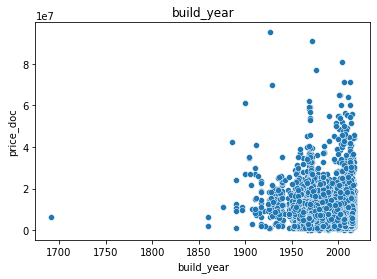

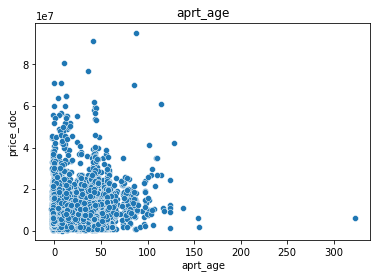

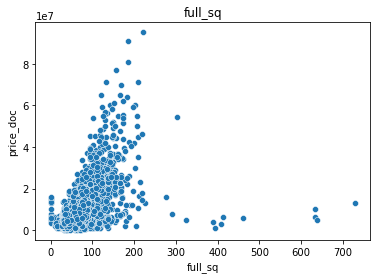

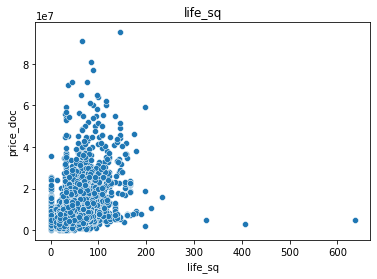

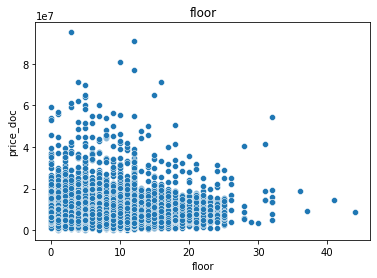

In [336]:
attr=['build_year','aprt_age','full_sq','life_sq','floor']
for feat in attr:
    ds=pd.concat([x_train,y_train], axis=1)
    sns.scatterplot(data=ds, x=ds[feat], y=ds['price_doc'])
    plt.title(feat)
    plt.show();

*Wide range of apartment price can be found between 100-200 full_sq area, price is slowly decreasing as the floor increases, above features are having importance*

### *Working on Test Set*
****************************************

In [337]:
x_test

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
13190,13193,2013-12-17,35,19.0,16.0,16.0,5.0,1976.0,1.0,10.0,...,13,8,1,0,4,12,0,2,25,5
725,726,2011-12-28,41,24.0,1.0,NaN,NaN,NaN,NaN,NaN,...,59,16,5,0,11,21,0,4,83,12
16710,16713,2014-03-29,54,33.0,3.0,5.0,2.0,1957.0,2.0,7.0,...,198,79,17,1,60,97,0,29,134,12
27718,27721,2015-02-04,62,44.0,12.0,12.0,1.0,1979.0,3.0,6.0,...,33,24,5,1,4,17,0,1,66,4
9688,9691,2013-08-07,82,82.0,16.0,NaN,NaN,NaN,NaN,NaN,...,11,3,2,0,2,16,1,0,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29263,29266,2015-04-20,45,43.0,2.0,12.0,1.0,2015.0,2.0,1.0,...,366,242,105,24,53,92,0,62,152,11
28570,28573,2015-03-24,77,46.0,13.0,16.0,1.0,1975.0,3.0,10.0,...,124,53,9,2,24,46,1,9,89,9
8813,8816,2013-07-01,54,30.0,3.0,14.0,1.0,1989.0,2.0,8.0,...,27,8,2,0,10,32,0,7,64,14
17457,17460,2014-04-15,47,30.0,5.0,5.0,1.0,1965.0,2.0,5.0,...,112,51,17,1,36,51,0,18,87,14


In [338]:
x_test.isnull().sum().sort_values(ascending=False).head(50)

hospital_beds_raion                      2880
state                                    2732
build_year                               2709
cafe_avg_price_500                       2629
cafe_sum_500_max_price_avg               2629
cafe_sum_500_min_price_avg               2629
max_floor                                1930
material                                 1930
num_room                                 1930
kitch_sq                                 1930
preschool_quota                          1309
school_quota                             1308
cafe_sum_1000_max_price_avg              1256
cafe_sum_1000_min_price_avg              1256
cafe_avg_price_1000                      1256
life_sq                                  1238
build_count_frame                         980
build_count_1971-1995                     980
build_count_block                         980
raion_build_count_with_material_info      980
build_count_after_1995                    980
build_count_brick                 

In [339]:
x_test=x_test.drop(li, axis=1)
x_test.shape

(6094, 220)

In [340]:
def clean_test(x_train):
    
    x_train['max_floor'].fillna(x_train['max_floor'].median(), inplace=True)
    x_train['max_floor'] = x_train['max_floor'].astype(int)
    
    x_train['build_year']=np.where(x_train['build_year']<1500, np.nan, x_train['build_year'])
    x_train.loc[x_train['build_year'] == 4965.0, 'build_year']=1965
    
    x_train['build_year'].fillna(x_train.groupby(['sub_area', 'max_floor'])['build_year'].transform('median'),
                             inplace=True)
    x_train['build_year'].fillna(x_train.groupby(['sub_area'])['build_year'].transform('median'), inplace=True)
    x_train['build_year'].fillna(x_train['build_year'].median(), inplace=True)
    
    x_train['floor'].fillna(x_train.groupby(['sub_area', 'max_floor'])['floor'].transform('median'), inplace=True)
    x_train['floor'].fillna(x_train.groupby(['sub_area'])['floor'].transform('median'), inplace=True)
    x_train['floor']=np.where((x_train['max_floor']-x_train['floor'])<0,x_train['max_floor'], x_train['floor'])
    
    x_train['floor']=x_train['floor'].astype(int)
    x_train['build_year']=x_train['build_year'].astype(int)
    
    x_train['state_null']=x_train['state'].isnull().astype(int)
    x_train['state']=x_train['state'].replace({None:0})
    
    x_train['cafe_sum_500_max_price_avg_null']=x_train['cafe_sum_500_max_price_avg'].isnull().astype(int)
    x_train['cafe_sum_500_min_price_avg_null']=x_train['cafe_sum_500_min_price_avg'].isnull().astype(int)
    x_train['cafe_sum_500_max_price_avg'].fillna(0, inplace=True)
    x_train['cafe_sum_500_min_price_avg'].fillna(0, inplace=True)

    x_train['hospital_beds_raion_null']=x_train['hospital_beds_raion'].isnull().astype(int)
    x_train['hospital_beds_raion'].fillna(0, inplace=True)
    x_train['hospital_beds_raion']=x_train['hospital_beds_raion'].astype(int)
    
    
        
    x_train['preschool_quota']=x_train['preschool_quota'].isnull().astype(int)
    x_train['school_quota']=x_train['school_quota'].isnull().astype(int)
    x_train['preschool_quota'].fillna(0, inplace=True)
    x_train['school_quota'].fillna(0, inplace=True)
    
    x_train['prom_part_5000'].fillna(x_train['prom_part_5000'].mean(), inplace=True)
    x_train['ID_railroad_station_walk'].fillna(x_train['ID_railroad_station_walk'].median(), inplace=True)
    x_train['railroad_station_walk_km'].fillna(x_train['railroad_station_walk_km'].mean(), inplace=True)
    x_train['metro_min_walk'].fillna(x_train['metro_min_walk'].mean(), inplace=True)
    
    x_train['timestamp']=pd.to_datetime(x_train['timestamp'])
    
    x_train.insert(2,'month_sold', x_train['timestamp'].dt.month)
    x_train.insert(3,'year_sold', x_train['timestamp'].dt.year)
    x_train.insert(4,'aprt_age', x_train['year_sold']-x_train['build_year'])
    
    for col in category[3:-1]:
        x_train[col]=np.where(x_train[col]=="yes", 1, 0)
        x_train[col]=pd.to_numeric(x_train[col], errors='coerce')
        
    x_train['product_type']=np.where(x_train['product_type']=="Investment", 1, 0)
    x_train['product_type']=pd.to_numeric(x_train['product_type'], errors='coerce')
    
    x_train['ecology']=x_train['ecology'].map({"satisfactory":3, "excellent":5, "poor":2, "good":4, "no data":1})


In [341]:
clean_test(x_test)

In [342]:
x_test.isnull().sum().any()

True

In [343]:
def change_test(column):
    x_test[column].fillna(x_test.groupby(['sub_area', 'full_sq'])[column].transform('median'), inplace=True)
    x_test[column].fillna(x_test.groupby(['sub_area'])[column].transform('median'), inplace=True)
    x_test[column]=x_test[column].astype(int)

   
def buildt(column):
    x_test[column].fillna(x_test[column].median(), inplace=True)


def cafet(column):
    x_test[column].fillna(x_test[column].mean(), inplace=True)


In [344]:
change_test('life_sq')
change_test('kitch_sq')
change_test('num_room')
change_test('material')

for col in build_cols:
    buildt(col)

for col in cafe_cols:
    cafet(col)

In [345]:
x_test.shape

(6094, 227)

In [346]:
x_test.isnull().sum().sort_values(ascending=False).head(2)

hospital_beds_raion_null    0
build_count_before_1920     0
dtype: int64

In [347]:
new1=[]
for nam in x_test['sub_area']:
    if nam.startswith(nam[:5]):
        new1.append(nam.replace(nam, nam[:5][::-1]))
x_test['sub_area']=np.array(new1)
x_test['sub_area']=x_test['sub_area'].replace(d)
x_test['sub_area'].nunique()

10

In [348]:
dummyt=pd.get_dummies(x_test['sub_area'], drop_first=True)
x_test=pd.concat([x_test,dummyt], axis=1)
x_test.drop(drop, axis=1, inplace=True)

In [349]:
x_test

,month_sold,year_sold,aprt_age,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,hospital_beds_raion_null,i'raM,kujrK,lesoP,nhzuJ,nitiM,other,reveS,srevT,trehC
13190,12,2013,37,35,19,16,16,5,1976,1,...,1,0,0,0,0,0,1,0,0,0
725,12,2011,21,41,24,1,12,2,1990,2,...,1,0,0,0,0,0,1,0,0,0
16710,3,2014,57,54,33,3,5,2,1957,2,...,0,0,0,0,0,0,1,0,0,0
27718,2,2015,36,62,44,12,12,1,1979,3,...,1,0,0,0,0,0,1,0,0,0
9688,8,2013,-2,82,82,12,12,1,2015,3,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29263,4,2015,0,45,43,2,12,1,2015,2,...,1,0,0,0,0,0,1,0,0,0
28570,3,2015,40,77,46,13,16,1,1975,3,...,0,0,0,0,0,0,1,0,0,0
8813,7,2013,24,54,30,3,14,1,1989,2,...,1,1,0,0,0,0,0,0,0,0
17457,4,2014,49,47,30,5,5,1,1965,2,...,0,0,0,0,0,0,1,0,0,0


In [350]:
#Scaling data, although tree based algos do not requires it, using with linear regression
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [351]:
x_trainc=pd.DataFrame(scale.fit_transform(x_train), columns=x_train.columns)

In [352]:
x_trainc

,month_sold,year_sold,aprt_age,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,hospital_beds_raion_null,i'raM,kujrK,lesoP,nhzuJ,nitiM,other,reveS,srevT,trehC
0,1.488779,-1.514782,0.427529,-0.990992,-0.976922,-1.222954,-0.066792,0.942809,-0.494221,-1.056660,...,-0.949735,-0.141578,-0.131443,-0.523923,-0.174959,-0.151651,0.865746,-0.16721,-0.15418,-0.147204
1,-0.500753,0.571869,1.187536,-0.605149,-0.732893,-0.607873,-0.066792,-0.529588,-1.156183,0.167481,...,-0.949735,-0.141578,-0.131443,-0.523923,-0.174959,-0.151651,0.865746,-0.16721,-0.15418,-0.147204
2,-1.069190,-0.471457,0.997534,-1.462578,-1.220950,-0.812900,-0.066792,0.206610,-1.014334,-1.056660,...,-0.949735,-0.141578,-0.131443,-0.523923,-0.174959,-0.151651,0.865746,-0.16721,-0.15418,-0.147204
3,-0.784971,-0.471457,1.140035,-0.905249,-0.976922,-1.222954,-0.066792,-0.529588,-1.156183,-1.056660,...,-0.949735,-0.141578,-0.131443,-0.523923,-0.174959,-0.151651,0.865746,-0.16721,-0.15418,-0.147204
4,1.488779,-1.514782,-1.234985,0.166537,-0.342447,1.032343,-0.066792,2.415207,1.160683,-1.056660,...,1.052925,-0.141578,-0.131443,1.908677,-0.174959,-0.151651,-1.155074,-0.16721,-0.15418,-0.147204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24371,-1.353409,1.615194,-1.044984,-0.219306,0.584862,-1.222954,-2.020241,-0.529588,1.113400,-1.056660,...,1.052925,-0.141578,-0.131443,1.908677,-0.174959,-0.151651,-1.155074,-0.16721,-0.15418,-0.147204
24372,-0.784971,0.571869,1.710040,0.080794,-0.049613,-0.812900,0.110795,0.206610,-1.676296,0.167481,...,-0.949735,-0.141578,-0.131443,-0.523923,-0.174959,-0.151651,0.865746,-0.16721,-0.15418,-0.147204
24373,-0.784971,1.615194,-1.092484,-0.648021,0.096805,-0.607873,-0.421964,-0.529588,1.160683,-1.056660,...,-0.949735,-0.141578,-0.131443,-0.523923,-0.174959,-0.151651,0.865746,-0.16721,-0.15418,-0.147204
24374,-0.784971,-0.471457,-1.187485,0.852480,1.805005,0.212235,-0.066792,-0.529588,1.160683,1.391621,...,1.052925,-0.141578,-0.131443,1.908677,-0.174959,-0.151651,-1.155074,-0.16721,-0.15418,-0.147204


In [353]:
x_testc=pd.DataFrame(scale.transform(x_test), columns=x_test.columns)
x_testc

,month_sold,year_sold,aprt_age,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,hospital_beds_raion_null,i'raM,kujrK,lesoP,nhzuJ,nitiM,other,reveS,srevT,trehC
0,1.488779,-0.471457,0.665031,-0.819507,-0.879310,1.852451,0.643554,2.415207,-0.683353,-1.056660,...,1.052925,-0.141578,-0.131443,-0.523923,-0.174959,-0.151651,0.865746,-0.16721,-0.15418,-0.147204
1,1.488779,-2.558107,-0.094975,-0.562278,-0.635281,-1.222954,-0.066792,0.206610,-0.021391,0.167481,...,1.052925,-0.141578,-0.131443,-0.523923,-0.174959,-0.151651,0.865746,-0.16721,-0.15418,-0.147204
2,-1.069190,0.571869,1.615039,-0.004949,-0.196030,-0.812900,-1.309896,0.206610,-1.581730,0.167481,...,-0.949735,-0.141578,-0.131443,-0.523923,-0.174959,-0.151651,0.865746,-0.16721,-0.15418,-0.147204
3,-1.353409,1.615194,0.617531,0.338022,0.340833,1.032343,-0.066792,-0.529588,-0.541504,1.391621,...,1.052925,-0.141578,-0.131443,-0.523923,-0.174959,-0.151651,0.865746,-0.16721,-0.15418,-0.147204
4,0.351904,-0.471457,-1.187485,1.195451,2.195451,1.032343,-0.066792,-0.529588,1.160683,1.391621,...,1.052925,-0.141578,-0.131443,1.908677,-0.174959,-0.151651,-1.155074,-0.16721,-0.15418,-0.147204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6089,-0.784971,1.615194,-1.092484,-0.390792,0.292028,-1.017927,-0.066792,-0.529588,1.160683,0.167481,...,1.052925,-0.141578,-0.131443,-0.523923,-0.174959,-0.151651,0.865746,-0.16721,-0.15418,-0.147204
6090,-1.069190,1.615194,0.807532,0.981094,0.438445,1.237370,0.643554,-0.529588,-0.730636,1.391621,...,-0.949735,-0.141578,-0.131443,-0.523923,-0.174959,-0.151651,0.865746,-0.16721,-0.15418,-0.147204
6091,0.067685,-0.471457,0.047526,-0.004949,-0.342447,-0.812900,0.288381,-0.529588,-0.068674,0.167481,...,1.052925,7.063240,-0.131443,-0.523923,-0.174959,-0.151651,-1.155074,-0.16721,-0.15418,-0.147204
6092,-0.784971,0.571869,1.235036,-0.305049,-0.342447,-0.402846,-1.309896,-0.529588,-1.203466,0.167481,...,-0.949735,-0.141578,-0.131443,-0.523923,-0.174959,-0.151651,0.865746,-0.16721,-0.15418,-0.147204


In [354]:
y_trainc=pd.DataFrame(scale.fit_transform(y_train), columns=y_train.columns)
y_trainc

,price_doc
0,-1.097263
1,0.290770
2,-0.559921
3,-0.276357
4,-0.381721
...,...
24371,-0.469454
24372,0.899907
24373,-0.541728
24374,-0.221660


### *Model Fitting and Metric Check*
********************

*Three type of models will be used:*
    
    -Linear Regression
    -Random Forest
    -Time Series
    
*For metrics I will be using*
    
    -RMSE: since it is having the result in the same unit as target variable.
    -MSLE: since it penalizes under-estimations more than over-estimations which are quite required for Sale prediction type data, and it do not perform with negative estimated values.
    -r2_score (default)
    

#### *Linear Regression*

In [355]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error

In [356]:
linear=LinearRegression()
linear.fit(x_trainc, y_trainc) 

LinearRegression()

In [357]:
y_predl=linear.predict(x_testc)  

In [358]:
y_predls=scale.inverse_transform(y_predl)
y_predls

array([[4133679.51441598],
       [6774873.78260579],
       [7800378.47670923],
       ...,
       [5261885.01362258],
       [6807242.19167246],
       [8169916.56535828]])

In [359]:
linear.score(x_trainc,y_trainc)

0.5553799248285016

In [360]:
linear.score(x_testc,scale.transform(y_test))

-1.1607738546401545

In [361]:
try:
    print("msle:", mean_squared_log_error(y_test, y_predls))
except ValueError as err:
    print(err)
finally:
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_predls)))

Mean Squared Logarithmic Error cannot be used when targets contain negative values.
rmse: 6864911.336758356


In [362]:
li=[1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,100000]
li

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

In [363]:
#Checking with Lasso, Ridge for different alpha values
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [364]:
def check_score(x_train,y_train,lis):
    
    r=[]
    l=[]
    for i in lis:
        ridge=Ridge(alpha=i)
        ridge.fit(x_train,y_train)
        r.append(ridge.score(x_train,y_train))
        
        lasso=Lasso(alpha=i)
        lasso.fit(x_train,y_train)
        l.append(lasso.score(x_train,y_train))
        
    return r,l

In [365]:
r,l=check_score(x_trainc,y_trainc,li)

In [366]:
max(r), max(l)

(0.5553801048873548, 0.5549279898899804)

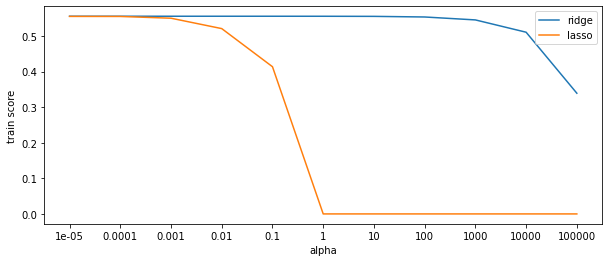

In [629]:
plt.figure(figsize=(10,4))
plt.plot(range(len(li)), r, label="ridge")
plt.plot(range(len(li)), l, label="lasso")
plt.xticks(np.linspace(0,10,11),li)
plt.xlabel("alpha")
plt.ylabel("train score")
plt.legend(loc=1);

*for Linear models, linear Reg, Ridge and Lasso failed to perform well, for Linear train score stood at 0.555 and for other two their train score is constant at 0.554 for the starting alpha values and then evantually decreasing, RMSE stood at 6864911.33 and MSLE cannot be used since model predicting neg price_doc.*

#### *RandomForest*

In [367]:
from sklearn.ensemble import RandomForestRegressor

In [368]:
forest=RandomForestRegressor(n_estimators=200, max_depth=6)
forest.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, n_estimators=200)

In [369]:
print("train score: ",forest.score(x_train,y_train), 
      "test score: ",forest.score(x_test,y_test))

train score:  0.7059573291676333 test score:  0.6516464042058296


In [370]:
y_predf=forest.predict(x_test)

In [371]:
print("rmse:", np.sqrt(mean_squared_error(y_test, y_predf)), 
      " msle:", mean_squared_log_error(y_test, y_predf))

rmse: 2756388.461714759  msle: 0.2433354890809871


*Random Forest helps in feature selection as well, so selecting features based on importance*

In [372]:
s=(list(forest.feature_importances_))
s

[0.0006315034326356073,
 0.0019146348474469456,
 0.0009541065258621084,
 0.5705037589352727,
 0.0012559901592438536,
 0.00036488219423896575,
 0.0010382919272761417,
 0.00026229822688196027,
 0.0012581965673593406,
 0.008278492666667733,
 0.0008903680844303546,
 0.008330146488182583,
 0.0001667600525053322,
 0.00026757275457451826,
 7.214107328019159e-05,
 0.003297309861427708,
 0.0015620282704370526,
 0.000112817616492425,
 2.2110748066471795e-06,
 3.924535106131026e-05,
 0.0006166954655694282,
 0.0,
 0.00019507933001163005,
 0.00022170727445221716,
 0.005526217606471967,
 0.00027142025984378736,
 0.00018314617638093324,
 0.0008370939813299034,
 3.0597534069888817e-05,
 0.0013650913405264123,
 0.0010292065281845423,
 9.948044873205633e-05,
 0.0008034734260435456,
 0.0,
 0.0,
 0.0,
 0.0001410924081876869,
 0.0,
 1.069656533049744e-05,
 0.0,
 4.273658070931955e-05,
 0.0008241333342372045,
 0.0002730110630644261,
 0.00022491238374368225,
 0.0007092585646749262,
 0.00015793191974416463,
 

In [373]:
imp_feat=pd.DataFrame({'feature':x_train.columns, 'imp':s})
imp_feat

,feature,imp
0,month_sold,0.000632
1,year_sold,0.001915
2,aprt_age,0.000954
3,full_sq,0.570504
4,life_sq,0.001256
...,...,...
228,nitiM,0.000000
229,other,0.000150
230,reveS,0.000000
231,srevT,0.000000


In [375]:
imp_feat.set_index(['feature'], inplace=True)
imp_feat.sort_values(['imp'], ascending=False).head(180).sum()

imp    0.998342
dtype: float64

*Top 180 out of 233 features contributing to near 99.99% of the importance(in terms of probability), hence training model with those selected features*

In [376]:
select_bestfeat=list(imp_feat.sort_values(['imp'], ascending=False).head(180).index)
select_bestfeat

['full_sq',
 'cafe_count_3000',
 'office_sqm_5000',
 'sport_count_3000',
 'ttk_km',
 'church_count_5000',
 'cafe_count_1000',
 'state',
 'num_room',
 'swim_pool_km',
 'cafe_count_5000_price_high',
 'hospital_beds_raion',
 'build_count_monolith',
 'cafe_count_3000_price_high',
 'zd_vokzaly_avto_km',
 'green_part_5000',
 'cemetery_km',
 'green_zone_part',
 'cafe_sum_2000_min_price_avg',
 'ID_railroad_station_walk',
 'theater_km',
 'fitness_km',
 'cafe_sum_5000_min_price_avg',
 'ID_metro',
 'public_transport_station_km',
 'cafe_sum_2000_max_price_avg',
 'cafe_sum_3000_min_price_avg',
 'railroad_km',
 'green_zone_km',
 'sport_count_5000',
 'cafe_sum_1500_min_price_avg',
 'prom_part_5000',
 'exhibition_km',
 'year_sold',
 'kindergarten_km',
 'sport_count_2000',
 'indust_part',
 'trc_count_1500',
 'nuclear_reactor_km',
 'basketball_km',
 'detention_facility_km',
 'culture_objects_top_25',
 'railroad_station_avto_km',
 'office_sqm_3000',
 'thermal_power_plant_km',
 'build_year',
 'life_sq',
 

##### *Tuning hyperparameters, using RandomizedSearchCV*

In [487]:
from sklearn.model_selection import RandomizedSearchCV

In [488]:
params = {'n_estimators':[100, 150, 200, 300],
          'min_samples_split':[1,2,3],
          'min_samples_leaf':[1,2,3],
          'max_depth':[5,6,7]
          }

In [489]:
random=RandomizedSearchCV(forest, params, n_jobs=4, verbose=3)

In [490]:
obj=random.fit(x_train[select_bestfeat], y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [493]:
obj.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 7}

In [377]:
forestt=RandomForestRegressor(n_estimators=200, min_samples_split=3, max_depth=7)
forestt.fit(x_train[select_bestfeat],y_train)

RandomForestRegressor(max_depth=7, min_samples_split=3, n_estimators=200)

In [378]:
print("train score: ",forestt.score(x_train[select_bestfeat],y_train), 
      "test score: ",forestt.score(x_test[select_bestfeat],y_test))

train score:  0.7427201753194936 test score:  0.6683566078139298


In [379]:
y_predft=forestt.predict(x_test[select_bestfeat])

In [380]:
print("rmse:", np.sqrt(mean_squared_error(y_test, y_predft)), 
      " msle:", mean_squared_log_error(y_test, y_predft))

rmse: 2689465.3210810386  msle: 0.23833876072119237


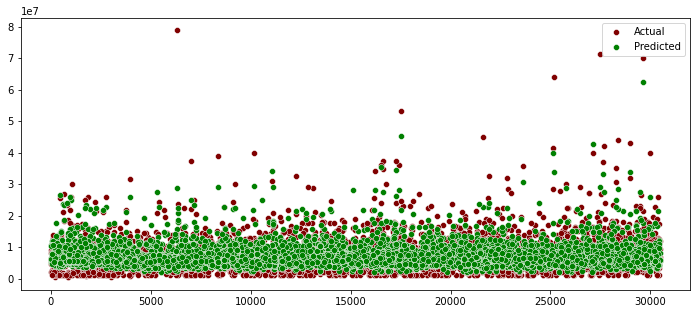

In [381]:
plt.figure(figsize=(12,5))
sns.scatterplot(y_test.index, np.array(y_test).ravel(), label='Actual', color='maroon')
sns.scatterplot(y_test.index, y_predft, label='Predicted', color='green')
plt.legend(loc=1);

#### *XGBRegressor*

In [382]:
from xgboost import XGBRegressor

In [1348]:
#choosing random hyper=parameter
xgb = XGBRegressor(n_estimators=200, learning_rate=0.04, min_child_weight=2, max_depth=7)
xgb.fit(x_train[select_bestfeat], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.04, max_delta_step=0, max_depth=7,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1349]:
print("train score: ",xgb.score(x_train[select_bestfeat],y_train), 
      "test score: ",xgb.score(x_test[select_bestfeat],y_test))

train score:  0.8868463232111893 test score:  0.7170886644335994


In [1350]:
y_predg=xgb.predict(x_test[select_bestfeat])

In [1351]:
print("rmse:", np.sqrt(mean_squared_error(y_test, y_predg)), 
      " msle:", mean_squared_log_error(y_test, y_predg))

rmse: 2484022.062651866  msle: 0.21944953952888507


##### *Tuning hyperparameters, using RandomizedSearchCV*

In [1095]:
params = {'learning_rate':[0.05, 0.1, 0.3, 0.5],
          'n_estimators':[100, 200, 300, 500],
          'max_depth':[5,6,7],
          'min_child_weight':[1,2]
          }

In [1096]:
random=RandomizedSearchCV(xgb, params, n_jobs=4, verbose=1)

In [1097]:
ob=random.fit(x_train[select_bestfeat], y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [1098]:
ob.best_params_

{'n_estimators': 300,
 'min_child_weight': 2,
 'max_depth': 5,
 'learning_rate': 0.05}

In [383]:
xgbt = XGBRegressor(n_estimators=300, learning_rate=0.08, min_child_weight=2, max_depth=5)
xgbt.fit(x_train[select_bestfeat], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [384]:
print("train score: ",xgbt.score(x_train[select_bestfeat],y_train), 
      "test score: ",xgbt.score(x_test[select_bestfeat],y_test))

train score:  0.869192114919953 test score:  0.7218969847186618


In [387]:
y_predgt=xgbt.predict(x_test[select_bestfeat])

In [388]:
print("rmse:", np.sqrt(mean_squared_error(y_test, y_predgt)), 
      " msle:", mean_squared_log_error(y_test, y_predgt))

rmse: 2462822.5602279776  msle: 0.21857363101431201


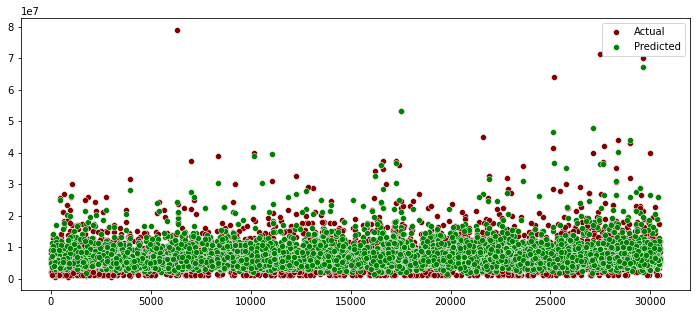

In [390]:
plt.figure(figsize=(12,5))
sns.scatterplot(y_test.index, np.array(y_test).ravel(), label='Actual', color='maroon')
sns.scatterplot(y_test.index, y_predgt, label='Predicted', color='green')
plt.legend(loc=1);

#### *TimeSeries*

In [837]:
dfs=df.iloc[:,[1,-1]]
dfs.head()

,timestamp,price_doc
0,2011-08-20,5850000
1,2011-08-23,6000000
2,2011-08-27,5700000
3,2011-09-01,13100000
4,2011-09-05,16331452


In [761]:
dfs['timestamp']=pd.to_datetime(dfs['timestamp'])

In [838]:
dfs.set_index("timestamp" , inplace=True)
dfs.head()

,price_doc
timestamp,
2011-08-20,5850000
2011-08-23,6000000
2011-08-27,5700000
2011-09-01,13100000
2011-09-05,16331452


In [764]:
df1=dfs.resample('D').sum()
df2=dfs.resample('D').mean()
df3=dfs.resample('W').sum()
df4=dfs.resample('W').mean()

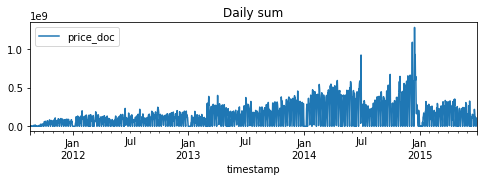

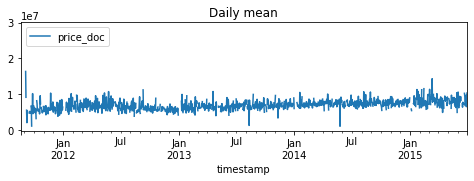

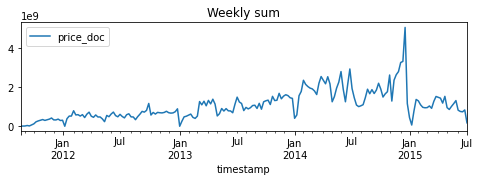

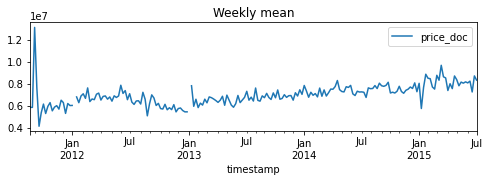

In [772]:
df1.plot(figsize=(8,2))
plt.title("Daily sum")
df2.plot(figsize=(8,2))
plt.title("Daily mean")
df3.plot(figsize=(8,2))
plt.title("Weekly sum")
df4.plot(figsize=(8,2))
plt.title("Weekly mean");

*Time was not regular in the raw data on daily basis, on resampling it day wise over 250 rows out of 1400 were getting 0/null, we could move forward with that using fillna or interpolation method, but when converting to weekly basis the decomposition of trend and seasonality was clear so I take weekly sum data, this will also bring changes in RMSE metric but MSLE won't be impacted much*

In [784]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize']=8,6

In [785]:
df3['price_doc']=df3['price_doc'].replace(0, df3['price_doc'].mean())

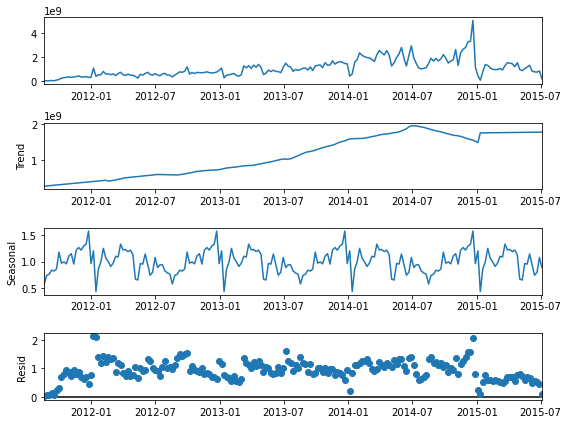

In [786]:
data_decompose=seasonal_decompose(df3, model="multiplicative", extrapolate_trend='freq')
data_decompose.plot()
plt.show()

There is trend and seasonality , will be using SARIMAX

In [788]:
#Using ADfuller test to check if data is stationary
from statsmodels.tsa.stattools import adfuller

In [787]:
def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
        print("Reject the null hypothesis(Ho). Data  is stationary")
    else:
        print("Fail to reject null hypothesis(Ho). time series has a unit root, Data is non-stationary ")

In [789]:
adfuller_test(df3)

ADF Test Statistic : -2.3315657267382877
p-value : 0.16198936994751217
Lags Used : 6
Number of Observations Used : 196
Fail to reject null hypothesis(Ho). time series has a unit root, Data is non-stationary 


In [790]:
#Shifting by 7
df3['Seasonal Difference'] = df3['price_doc'] - df3['price_doc'].shift(7)
df3.head(12)

,price_doc,Seasonal Difference
timestamp,,
2011-08-21,5850000,NaN
2011-08-28,11700000,NaN
2011-09-04,13100000,NaN
2011-09-11,38231452,NaN
2011-09-18,16550000,NaN
2011-09-25,69800000,NaN
2011-10-02,122967200,NaN
2011-10-09,227612000,221762000.0
2011-10-16,273454000,261754000.0


In [793]:
adfuller_test(df3['Seasonal Difference'].dropna())

ADF Test Statistic : -4.0326195486156715
p-value : 0.001249014722590392
Lags Used : 14
Number of Observations Used : 181
Reject the null hypothesis(Ho). Data  is stationary


In [794]:
import statsmodels.graphics.tsaplots as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Using pacf, acf plot to know the value for AR and MA

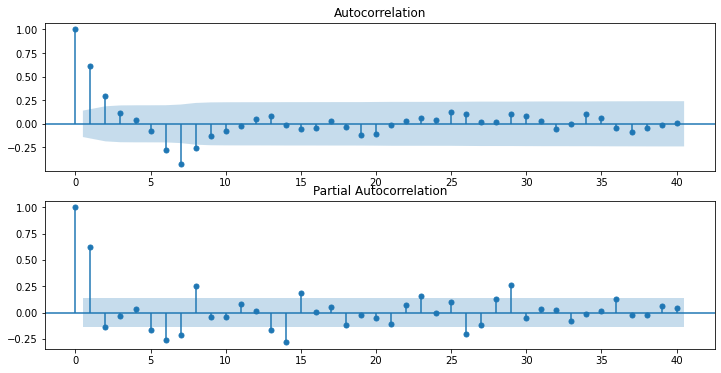

In [796]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(211)
fig = sm.plot_acf(df3['Seasonal Difference'].iloc[7:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.plot_pacf(df3['Seasonal Difference'].iloc[7:],lags=40,ax=ax2)

Tried with parameters p=2, d=1, q=2, but it was not showing good results, choosing another combination (5,1,2)

In [814]:
sarima=sms.tsa.statespace.SARIMAX(df3['price_doc'],order=(5, 1, 2),seasonal_order=(1,1,1,7)) 
model=sarima.fit()

In [815]:
model.aic

8362.891871874966

In [816]:
df3['forecast']=model.predict(start=163,end=202,dynamic=True)

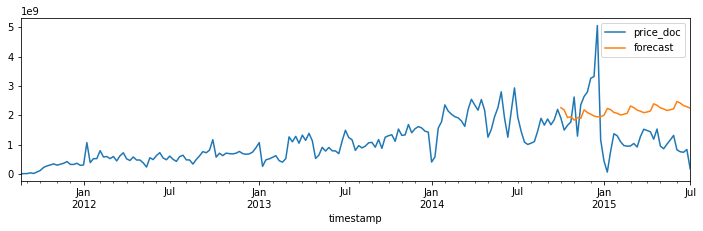

In [817]:
df3[['price_doc','forecast']].plot(figsize=(12,3));

Graph shows some seasonality but trend is way too off, need to work with moving average, checking aic with different combination of order

In [839]:
for i in range(5,8):
    for j in range(1,3):
        for k in range(2,6):
            try:
                sarima=sms.tsa.statespace.SARIMAX(df3['price_doc'],order=(i, j, k),seasonal_order=(1,1,1,7)) 
                model=sarima.fit()
                print((i,j,k),"--", model.aic)
            except:
                continue

(5, 1, 2) -- 8362.891871874966
(5, 1, 3) -- 8348.959695813735
(5, 1, 4) -- 8357.822255702655
(5, 1, 5) -- 8360.81653745665
(5, 2, 2) -- 8348.818403200985
(5, 2, 3) -- 8336.183456440289
(5, 2, 4) -- 8345.17342299458
(5, 2, 5) -- 8339.296197462272
(6, 1, 2) -- 8364.995131716882
(6, 1, 3) -- 8349.904106444541
(6, 1, 4) -- 8358.184738820932
(6, 1, 5) -- 8361.657089521701
(6, 2, 2) -- 8348.61855868996
(6, 2, 3) -- 8333.083504322236
(6, 2, 4) -- 8320.534509427947
(6, 2, 5) -- 8333.195230264202


In [831]:
sarima=sms.tsa.statespace.SARIMAX(df3['price_doc'],order=(6, 2, 4),seasonal_order=(1,1,1,14)) 
model=sarima.fit()

In [832]:
df3['forecast']=model.predict(start=163,end=202,dynamic=True)

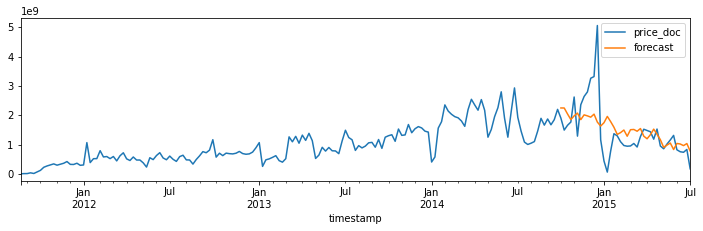

In [833]:
df3[['price_doc','forecast']].plot(figsize=(12,3));

In [834]:
actual=np.array(df3['price_doc'].iloc[163:202])
pred=np.array(df3['forecast'].iloc[163:202])

In [835]:
print("rmse:", np.sqrt(mean_squared_error(actual, pred)), 
      " msle:", mean_squared_log_error(actual, pred))

rmse: 820119907.5047622  msle: 0.4762738172933999


*The model unable to catch the sudden spike and fall where such event was also an unexpected case, but it predict the downward trend correctly however it did not perform that well on metric part.*

**************

In [391]:
score=pd.DataFrame({'RMSE':[np.sqrt(mean_squared_error(y_test, y_predls)),
        np.sqrt(mean_squared_error(y_test, y_predft)),
        np.sqrt(mean_squared_error(y_test, y_predgt))],
 'MSLE':['NA',mean_squared_log_error(y_test, y_predft),mean_squared_log_error(y_test, y_predgt)]}, index=['Linear', 'RandomForest', 'XGBRegressor'])

In [633]:
import pickle
pickle.dump(xgbt, open('xgbt_text.pkl', 'wb'))

**************

### *Results and Conclusion*
**************

*As per the description there were features related to Apartment and then we have features related to surrounding neighbors so I started analysing with first Apartment attributes and then surrounding attributes, there were many features ending with 'Raion' were contant across each sub_area so I did not touch them for further analysis. Features like full_sq, life_sq, floor, material, build_year were found to be of much importance so they were handled separately, Other surrounding features mainly distance related like school, public transport, water reserv, park, offices does have importance and I donot see population related feature of much importance for price_doc. Null values are treated by grouping sub_area and then further sub grouping to get more precise median values. Some new features are being introduced, from timestamp I created month, year, apartment age which comes out to be quite important when done feature selection, also captured null values with new features where the percentage was more.*

In [392]:
score

,RMSE,MSLE
Linear,6.864911e+06,NA
RandomForest,2.689465e+06,0.238339
XGBRegressor,2.462823e+06,0.218574


*For metric I choose RMSE and MLSE, Three models were asked to use, but I also used XGBRegressor for price prediction, Linear Regression models didn't performed well on metric, were also underfitting, for Time Series I have tried resampling the data to get clear view, then I used SARIMAX on weekly sum data which performed average although it captures the trend but MSLE was not coming satisfactory. With other two, Random Forest and XGBRegressor the former was showing more variance in train-test score when the tree is grown more by increasing max_depth and the latter performs well while predicting and wrt RandomForest there is a decrease in <B/>MSLE</B> by <B/>8.3%</B>, stating enhanced performance, so <B/>XGBRegressor</B> is chosen as the final model.*

__*Shubham Bachchan*